# FPGheArt - Week 3 exercise

### Lorenzo Buriola - 2021860
### Filippo Conforto - 2021856
### Lorenzo Domenichetti - 2011653




In [1]:
import numpy as np
import random
import keras
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras import initializers, regularizers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [2]:
import os
os.environ['PYTHONHASHSEED'] = '0'

In [3]:
np.random.seed(12)
tf.random.set_seed(13)
random.seed(23)

### Useful function

In [4]:
def plot_res(fit1):
    '''
    Simple function to plot the history of train and validation accuracy
    '''
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

    # summarize history for loss
    ax1.plot(fit1.history['loss'], label = "Train Loss", color = '#648FFF', lw = 2.5)
    ax1.plot(fit1.history['val_loss'], label = "Validation Loss", color = '#FE6100', lw = 2.5)
    ax1.legend()
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Model Loss')
    ax1.grid(ls = '--')

    # summarize history for accuracy
    ax2.plot(fit1.history['accuracy'], label = 'Train Accuracy', color =  '#648FFF', lw = 2.5)
    ax2.plot(fit1.history['val_accuracy'], label = 'Validation Accuracy', color = '#FE6100', lw = 2.5)
    ax2.legend()
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Model Accuracy')
    ax2.grid(ls = '--')

    plt.show()

In [5]:
def plot_acc(fit, label_fit, colors = ['blue', 'red', 'green']):
    """
    Simple function to compare the learning curve of various model
    """
    fig, ax = plt.subplots(figsize = (10, 7))
    for i in range(len(fit)):
        ax.plot(fit[i].history['accuracy'], label = (label_fit[i] + ' Train Accuracy'), lw = 2.5, ls = '--', color = colors[i])
        ax.plot(fit[i].history['val_accuracy'], label = (label_fit[i] + ' Validation Accuracy'), lw = 2.5, color = colors[i])
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Model Accuracy')
    ax.grid(ls = '--')
    ax.legend()
    plt.show()

In [6]:
def plot_conf_mat(c_matrix, ax, title = ''):
    """
    Simple function that plot the confusion matrix
    """
    ax.imshow(c_matrix, cmap = plt.cm.YlGn, alpha = 0.5, vmin = 0, vmax = 1)
    ax.set_xticks(np.arange(3))
    ax.set_yticks(np.arange(3))
    for i in range(3):
        for j in range(3):
            ax.text(x=j, y=i, s=round(c_matrix[i, j],2), ha="center", va="center")
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    ax.set_title(title)
    fig.tight_layout()

In [7]:
def create_CNN(reg, lam, fil, k_size, dense, Poolsize, bias_reg, act_reg):
    """
    This function allow to define a CNN given its parameters
    """
    ini = initializers.RandomNormal(mean = 0, stddev = 0.05)

    model = Sequential()
    if bias_reg == True:        
        model.add(Conv1D(filters = fil[0], kernel_size = k_size[0],
                            kernel_regularizer = reg(lam),
                            kernel_initializer=ini,
                            bias_regularizer = reg(lam),
                            bias_initializer = ini,
                            activation = "relu",
                            input_shape = input_shape
                            ))
    elif act_reg == True:    
        model.add(Conv1D(filters = fil[0], kernel_size = k_size[0],
                            kernel_regularizer = reg(lam),
                            kernel_initializer=ini,
                            activity_regularizer = reg(lam),
                            activation = "relu",
                            input_shape = input_shape
                            ))
    else:     
        model.add(Conv1D(filters = fil[0], kernel_size = k_size[0],
                            kernel_regularizer = reg(lam),
                            kernel_initializer=ini,
                            activation = "relu",
                            input_shape = input_shape
                            ))
        
    model.add(MaxPooling1D(Poolsize))
    for i in range(1,len(fil)):
        model.add(Conv1D(filters = fil[i], kernel_size = k_size[i], activation = "relu"))
        #model.add(MaxPooling1D(Poolsize))
    model.add(Flatten())
    for i in range(len(dense)):
        model.add(Dense(dense[i],activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(N_categ, activation="softmax"))
    return model

In [8]:
def compile_model(reg = regularizers.l2, lam = 0.001, fil = [5,5], 
                  k_size = [11,7], dense = [10], Poolsize = 5, bias_reg = False, act_reg = False):
    # create the mode
    model=create_CNN(reg, lam, fil, k_size, dense, Poolsize, bias_reg, act_reg)
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer = "adam", metrics = ["accuracy"])
    return model

# Ex 1

## Data 

In [9]:
str0 = "ts_L60_Z12_A500.0_DX50_bias5_N10000"

fnamex = "DATA/x_"+str0+".csv"
fnamey = "DATA/y_"+str0+".csv"

x = np.asarray(pd.read_csv(fnamex, header = None))
N = len(x)
print(x.shape)

(10000, 60)


In [10]:
categ  = np.asarray(pd.read_csv(fnamey, header = None), dtype = int)
y = to_categorical(categ)

In [11]:
L = len(x[0])
input_shape = (len(x[0]),1)
N_categ = 3

## Data splitting

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle = True)
x_train = x_train.reshape(x_train.shape[0],L,1)
x_test = x_test.reshape(x_test.shape[0],L,1)

## CNN definition

In [13]:
model = compile_model()
model.save_weights('Original_Weights_CNN1.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 50, 5)             60        
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 10, 5)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 4, 5)              180       
_________________________________________________________________
flatten (Flatten)            (None, 20)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                210       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 3

The model previously defined is trained using the original data (NOT standardized).

In [14]:
hist = model.fit(x_train, y_train, batch_size = 250, epochs = 250, 
                 validation_data = (x_test, y_test), 
                verbose = 2, shuffle = True)

Epoch 1/250
32/32 - 3s - loss: 30921.4316 - accuracy: 0.3313 - val_loss: 1.1134 - val_accuracy: 0.3265
Epoch 2/250
32/32 - 0s - loss: 1.1211 - accuracy: 0.3220 - val_loss: 1.1126 - val_accuracy: 0.3265
Epoch 3/250
32/32 - 0s - loss: 1.1092 - accuracy: 0.3329 - val_loss: 1.1103 - val_accuracy: 0.3270
Epoch 4/250
32/32 - 0s - loss: 1.1008 - accuracy: 0.3261 - val_loss: 1.1082 - val_accuracy: 0.3265
Epoch 5/250
32/32 - 0s - loss: 1.0998 - accuracy: 0.3326 - val_loss: 1.1094 - val_accuracy: 0.3265
Epoch 6/250
32/32 - 0s - loss: 1.0994 - accuracy: 0.3334 - val_loss: 1.1083 - val_accuracy: 0.3265
Epoch 7/250
32/32 - 0s - loss: 1.0984 - accuracy: 0.3309 - val_loss: 1.1085 - val_accuracy: 0.3270
Epoch 8/250
32/32 - 0s - loss: 1.0984 - accuracy: 0.3304 - val_loss: 1.1086 - val_accuracy: 0.3265
Epoch 9/250
32/32 - 0s - loss: 1.0994 - accuracy: 0.3311 - val_loss: 1.1099 - val_accuracy: 0.3270
Epoch 10/250
32/32 - 0s - loss: 1.0989 - accuracy: 0.3319 - val_loss: 1.1092 - val_accuracy: 0.3270
Epoch

Epoch 83/250
32/32 - 0s - loss: 1.0983 - accuracy: 0.3327 - val_loss: 1.1080 - val_accuracy: 0.3265
Epoch 84/250
32/32 - 0s - loss: 1.0983 - accuracy: 0.3325 - val_loss: 1.1079 - val_accuracy: 0.3265
Epoch 85/250
32/32 - 0s - loss: 1.0985 - accuracy: 0.3300 - val_loss: 1.1078 - val_accuracy: 0.3265
Epoch 86/250
32/32 - 0s - loss: 1.0985 - accuracy: 0.3305 - val_loss: 1.1078 - val_accuracy: 0.3265
Epoch 87/250
32/32 - 0s - loss: 1.0983 - accuracy: 0.3280 - val_loss: 1.1077 - val_accuracy: 0.3265
Epoch 88/250
32/32 - 0s - loss: 1.0983 - accuracy: 0.3276 - val_loss: 1.1076 - val_accuracy: 0.3270
Epoch 89/250
32/32 - 0s - loss: 1.0984 - accuracy: 0.3309 - val_loss: 1.1076 - val_accuracy: 0.3265
Epoch 90/250
32/32 - 0s - loss: 1.0983 - accuracy: 0.3354 - val_loss: 1.1076 - val_accuracy: 0.3265
Epoch 91/250
32/32 - 0s - loss: 1.0985 - accuracy: 0.3315 - val_loss: 1.1076 - val_accuracy: 0.3270
Epoch 92/250
32/32 - 0s - loss: 1.0983 - accuracy: 0.3315 - val_loss: 1.1076 - val_accuracy: 0.3265


Epoch 165/250
32/32 - 0s - loss: 1.0985 - accuracy: 0.3351 - val_loss: 1.0999 - val_accuracy: 0.3270
Epoch 166/250
32/32 - 0s - loss: 1.0983 - accuracy: 0.3290 - val_loss: 1.0997 - val_accuracy: 0.3265
Epoch 167/250
32/32 - 0s - loss: 1.0983 - accuracy: 0.3330 - val_loss: 1.0997 - val_accuracy: 0.3270
Epoch 168/250
32/32 - 0s - loss: 1.0983 - accuracy: 0.3351 - val_loss: 1.0997 - val_accuracy: 0.3270
Epoch 169/250
32/32 - 0s - loss: 1.0985 - accuracy: 0.3335 - val_loss: 1.0997 - val_accuracy: 0.3265
Epoch 170/250
32/32 - 0s - loss: 1.0985 - accuracy: 0.3339 - val_loss: 1.0998 - val_accuracy: 0.3270
Epoch 171/250
32/32 - 0s - loss: 1.0985 - accuracy: 0.3350 - val_loss: 1.0998 - val_accuracy: 0.3270
Epoch 172/250
32/32 - 0s - loss: 1.0983 - accuracy: 0.3316 - val_loss: 1.1000 - val_accuracy: 0.3270
Epoch 173/250
32/32 - 0s - loss: 1.0985 - accuracy: 0.3316 - val_loss: 1.1000 - val_accuracy: 0.3265
Epoch 174/250
32/32 - 0s - loss: 1.0985 - accuracy: 0.3352 - val_loss: 1.1000 - val_accurac

32/32 - 0s - loss: 1.0983 - accuracy: 0.3352 - val_loss: 1.1027 - val_accuracy: 0.3265
Epoch 247/250
32/32 - 0s - loss: 1.0985 - accuracy: 0.3271 - val_loss: 1.1026 - val_accuracy: 0.3270
Epoch 248/250
32/32 - 0s - loss: 1.0985 - accuracy: 0.3326 - val_loss: 1.1027 - val_accuracy: 0.3265
Epoch 249/250
32/32 - 0s - loss: 1.0983 - accuracy: 0.3316 - val_loss: 1.1027 - val_accuracy: 0.3270
Epoch 250/250
32/32 - 0s - loss: 1.0983 - accuracy: 0.3343 - val_loss: 1.1027 - val_accuracy: 0.3265


In [15]:
print(f"Validation accuracy is {model.evaluate(x_test, y_test, verbose = 0)[1]:1.2}")

Validation accuracy is 0.33


As we expected the error does not decrease during the trainig procedure, this is due to the fact that the NN has as input larger numbers. To have decent results standardized data are used, avoiding gradient vanishing during training,

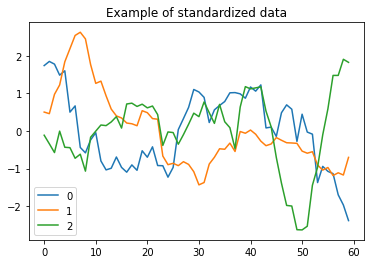

In [16]:
#Standardized data are computed
scaler = StandardScaler()
x_std =  scaler.fit_transform(x.T).T

plt.plot(x_std[0], label = '0')
plt.plot(x_std[1], label = '1')
plt.plot(x_std[2], label = '2')
plt.title('Example of standardized data')
plt.legend()
plt.show() 

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.2) #using standardized data
x_train = x_train.reshape(x_train.shape[0],L,1)
x_test = x_test.reshape(x_test.shape[0],L,1)

In [18]:
model = compile_model()
hist = model.fit(x_train, y_train, batch_size = 250, epochs = 300, 
                 validation_data = (x_test, y_test), 
                verbose = 2, shuffle = True)

Epoch 1/300
32/32 - 1s - loss: 1.0942 - accuracy: 0.3649 - val_loss: 1.0873 - val_accuracy: 0.4450
Epoch 2/300
32/32 - 0s - loss: 1.0804 - accuracy: 0.4404 - val_loss: 1.0660 - val_accuracy: 0.5160
Epoch 3/300
32/32 - 0s - loss: 1.0535 - accuracy: 0.4748 - val_loss: 1.0264 - val_accuracy: 0.5495
Epoch 4/300
32/32 - 0s - loss: 1.0201 - accuracy: 0.4926 - val_loss: 0.9853 - val_accuracy: 0.5680
Epoch 5/300
32/32 - 0s - loss: 0.9844 - accuracy: 0.5200 - val_loss: 0.9431 - val_accuracy: 0.5880
Epoch 6/300
32/32 - 0s - loss: 0.9490 - accuracy: 0.5441 - val_loss: 0.9071 - val_accuracy: 0.6090
Epoch 7/300
32/32 - 0s - loss: 0.9148 - accuracy: 0.5642 - val_loss: 0.8644 - val_accuracy: 0.6350
Epoch 8/300
32/32 - 0s - loss: 0.8827 - accuracy: 0.5819 - val_loss: 0.8295 - val_accuracy: 0.6575
Epoch 9/300
32/32 - 0s - loss: 0.8519 - accuracy: 0.6072 - val_loss: 0.7948 - val_accuracy: 0.6685
Epoch 10/300
32/32 - 0s - loss: 0.8257 - accuracy: 0.6211 - val_loss: 0.7640 - val_accuracy: 0.6875
Epoch 11/

32/32 - 0s - loss: 0.5494 - accuracy: 0.7855 - val_loss: 0.5146 - val_accuracy: 0.8010
Epoch 84/300
32/32 - 0s - loss: 0.5544 - accuracy: 0.7815 - val_loss: 0.5140 - val_accuracy: 0.8010
Epoch 85/300
32/32 - 0s - loss: 0.5480 - accuracy: 0.7874 - val_loss: 0.5114 - val_accuracy: 0.8075
Epoch 86/300
32/32 - 0s - loss: 0.5455 - accuracy: 0.7885 - val_loss: 0.5103 - val_accuracy: 0.7990
Epoch 87/300
32/32 - 0s - loss: 0.5420 - accuracy: 0.7870 - val_loss: 0.5129 - val_accuracy: 0.7990
Epoch 88/300
32/32 - 0s - loss: 0.5490 - accuracy: 0.7846 - val_loss: 0.5068 - val_accuracy: 0.8015
Epoch 89/300
32/32 - 0s - loss: 0.5519 - accuracy: 0.7830 - val_loss: 0.5107 - val_accuracy: 0.8005
Epoch 90/300
32/32 - 0s - loss: 0.5434 - accuracy: 0.7904 - val_loss: 0.5103 - val_accuracy: 0.8000
Epoch 91/300
32/32 - 0s - loss: 0.5397 - accuracy: 0.7895 - val_loss: 0.5059 - val_accuracy: 0.8025
Epoch 92/300
32/32 - 0s - loss: 0.5424 - accuracy: 0.7901 - val_loss: 0.5115 - val_accuracy: 0.8000
Epoch 93/300


Epoch 165/300
32/32 - 0s - loss: 0.4983 - accuracy: 0.8092 - val_loss: 0.4780 - val_accuracy: 0.8170
Epoch 166/300
32/32 - 0s - loss: 0.4953 - accuracy: 0.8109 - val_loss: 0.4786 - val_accuracy: 0.8165
Epoch 167/300
32/32 - 0s - loss: 0.4999 - accuracy: 0.8086 - val_loss: 0.4856 - val_accuracy: 0.8140
Epoch 168/300
32/32 - 0s - loss: 0.5005 - accuracy: 0.8058 - val_loss: 0.4748 - val_accuracy: 0.8190
Epoch 169/300
32/32 - 0s - loss: 0.4952 - accuracy: 0.8126 - val_loss: 0.4786 - val_accuracy: 0.8175
Epoch 170/300
32/32 - 0s - loss: 0.4932 - accuracy: 0.8123 - val_loss: 0.4763 - val_accuracy: 0.8190
Epoch 171/300
32/32 - 0s - loss: 0.4957 - accuracy: 0.8116 - val_loss: 0.4774 - val_accuracy: 0.8170
Epoch 172/300
32/32 - 0s - loss: 0.4957 - accuracy: 0.8102 - val_loss: 0.4755 - val_accuracy: 0.8225
Epoch 173/300
32/32 - 0s - loss: 0.4912 - accuracy: 0.8134 - val_loss: 0.4758 - val_accuracy: 0.8145
Epoch 174/300
32/32 - 0s - loss: 0.4978 - accuracy: 0.8079 - val_loss: 0.4866 - val_accurac

Epoch 247/300
32/32 - 0s - loss: 0.4843 - accuracy: 0.8135 - val_loss: 0.4738 - val_accuracy: 0.8210
Epoch 248/300
32/32 - 0s - loss: 0.4830 - accuracy: 0.8173 - val_loss: 0.4729 - val_accuracy: 0.8225
Epoch 249/300
32/32 - 0s - loss: 0.4792 - accuracy: 0.8198 - val_loss: 0.4710 - val_accuracy: 0.8230
Epoch 250/300
32/32 - 0s - loss: 0.4798 - accuracy: 0.8167 - val_loss: 0.4722 - val_accuracy: 0.8220
Epoch 251/300
32/32 - 0s - loss: 0.4781 - accuracy: 0.8176 - val_loss: 0.4728 - val_accuracy: 0.8200
Epoch 252/300
32/32 - 0s - loss: 0.4766 - accuracy: 0.8160 - val_loss: 0.4719 - val_accuracy: 0.8235
Epoch 253/300
32/32 - 0s - loss: 0.4816 - accuracy: 0.8174 - val_loss: 0.4713 - val_accuracy: 0.8220
Epoch 254/300
32/32 - 0s - loss: 0.4677 - accuracy: 0.8216 - val_loss: 0.4735 - val_accuracy: 0.8160
Epoch 255/300
32/32 - 0s - loss: 0.4815 - accuracy: 0.8149 - val_loss: 0.4751 - val_accuracy: 0.8165
Epoch 256/300
32/32 - 0s - loss: 0.4853 - accuracy: 0.8150 - val_loss: 0.4707 - val_accurac

In [19]:
print(f"Validation accuracy is {model.evaluate(x_test, y_test, verbose = 0)[1]:1.2}")

Validation accuracy is 0.82


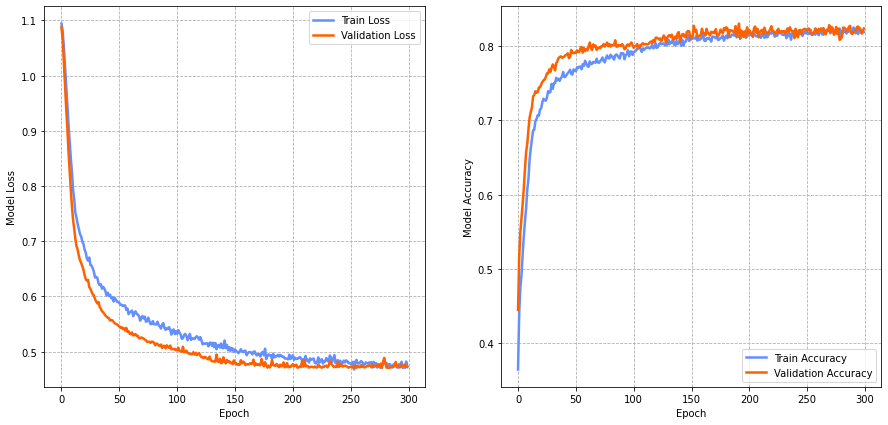

In [20]:
plot_res(hist)

After stadardization the model is working fine.

## Confusion Matrix

A confusion matix helps to visualize the performance of the CNN in the classification task

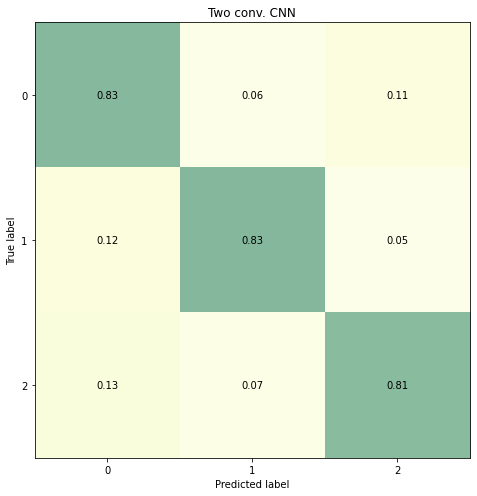

In [21]:
c_matrix = confusion_matrix(np.argmax(y_test, axis =1),np.argmax(model.predict(x_test), axis=1),  normalize = 'true')
fig, ax1 = plt.subplots(figsize = (7,7))
plot_conf_mat(c_matrix, ax1, 'Two conv. CNN')
plt.show()

For each class more than the 80% of the data are correctly classified.

## Signal-to-noise ratio performances dependance

In this section the performance of the network are tested reducing the signal-to-noise ratio. Different datasets are produced using different parameters A (amplitude of external signal) and are fed in the network. Confusion matrices are displayed in order to better visualize the results.

In [22]:
As = np.linspace(50,500,10)
res = []
y_predicted_list = []
y_list = []

for A in As:
    str0 = f"ts_L60_Z12_A{A}_DX50_bias5_N10000"
    fnamex = "DATA/x_" + str0 + ".csv"
    fnamey = "DATA/y_" + str0 + ".csv"

    x = np.asarray(pd.read_csv(fnamex, header = None))

    x_std =  scaler.fit_transform(x.T).T

    categ  = np.asarray(pd.read_csv(fnamey, header = None), dtype = int)
    
    y = to_categorical(categ)

    x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.2)
    x_train = x_train.reshape(x_train.shape[0],L,1)
    x_test = x_test.reshape(x_test.shape[0],L,1)
    
    model.load_weights("Original_Weights_CNN1.h5")  #We load the original weights to restart every time the fit
    
    hist = model.fit(x_train, y_train, batch_size = 250, epochs = 150, 
                 validation_data = (x_test, y_test), 
                verbose = 2, shuffle = True)
    res.append(pd.DataFrame(hist.history).iloc[:,-1])
    y_list.append(np.argmax(y_test, axis = 1))
    y_predicted_list.append(np.argmax(model.predict(x_test), axis = 1))

Epoch 1/150
32/32 - 0s - loss: 1.0998 - accuracy: 0.3359 - val_loss: 1.0991 - val_accuracy: 0.3305
Epoch 2/150
32/32 - 0s - loss: 1.0991 - accuracy: 0.3269 - val_loss: 1.0990 - val_accuracy: 0.3360
Epoch 3/150
32/32 - 0s - loss: 1.0992 - accuracy: 0.3239 - val_loss: 1.0990 - val_accuracy: 0.3390
Epoch 4/150
32/32 - 0s - loss: 1.0992 - accuracy: 0.3298 - val_loss: 1.0989 - val_accuracy: 0.3340
Epoch 5/150
32/32 - 0s - loss: 1.0993 - accuracy: 0.3327 - val_loss: 1.0989 - val_accuracy: 0.3425
Epoch 6/150
32/32 - 0s - loss: 1.0986 - accuracy: 0.3386 - val_loss: 1.0988 - val_accuracy: 0.3360
Epoch 7/150
32/32 - 0s - loss: 1.0987 - accuracy: 0.3341 - val_loss: 1.0988 - val_accuracy: 0.3360
Epoch 8/150
32/32 - 0s - loss: 1.0989 - accuracy: 0.3320 - val_loss: 1.0987 - val_accuracy: 0.3410
Epoch 9/150
32/32 - 0s - loss: 1.0986 - accuracy: 0.3400 - val_loss: 1.0987 - val_accuracy: 0.3435
Epoch 10/150
32/32 - 0s - loss: 1.0989 - accuracy: 0.3294 - val_loss: 1.0987 - val_accuracy: 0.3420
Epoch 11/

Epoch 84/150
32/32 - 0s - loss: 1.0975 - accuracy: 0.3471 - val_loss: 1.0991 - val_accuracy: 0.3480
Epoch 85/150
32/32 - 0s - loss: 1.0973 - accuracy: 0.3548 - val_loss: 1.0991 - val_accuracy: 0.3520
Epoch 86/150
32/32 - 0s - loss: 1.0972 - accuracy: 0.3553 - val_loss: 1.0992 - val_accuracy: 0.3450
Epoch 87/150
32/32 - 0s - loss: 1.0974 - accuracy: 0.3564 - val_loss: 1.0992 - val_accuracy: 0.3475
Epoch 88/150
32/32 - 0s - loss: 1.0968 - accuracy: 0.3629 - val_loss: 1.0991 - val_accuracy: 0.3535
Epoch 89/150
32/32 - 0s - loss: 1.0975 - accuracy: 0.3445 - val_loss: 1.0993 - val_accuracy: 0.3485
Epoch 90/150
32/32 - 0s - loss: 1.0967 - accuracy: 0.3529 - val_loss: 1.0992 - val_accuracy: 0.3430
Epoch 91/150
32/32 - 0s - loss: 1.0970 - accuracy: 0.3626 - val_loss: 1.0993 - val_accuracy: 0.3420
Epoch 92/150
32/32 - 0s - loss: 1.0970 - accuracy: 0.3582 - val_loss: 1.0992 - val_accuracy: 0.3410
Epoch 93/150
32/32 - 0s - loss: 1.0974 - accuracy: 0.3480 - val_loss: 1.0992 - val_accuracy: 0.3405


Epoch 16/150
32/32 - 0s - loss: 1.0964 - accuracy: 0.3546 - val_loss: 1.0989 - val_accuracy: 0.3270
Epoch 17/150
32/32 - 0s - loss: 1.0952 - accuracy: 0.3581 - val_loss: 1.0986 - val_accuracy: 0.3335
Epoch 18/150
32/32 - 0s - loss: 1.0955 - accuracy: 0.3599 - val_loss: 1.0989 - val_accuracy: 0.3340
Epoch 19/150
32/32 - 0s - loss: 1.0956 - accuracy: 0.3569 - val_loss: 1.0990 - val_accuracy: 0.3295
Epoch 20/150
32/32 - 0s - loss: 1.0956 - accuracy: 0.3543 - val_loss: 1.0990 - val_accuracy: 0.3315
Epoch 21/150
32/32 - 0s - loss: 1.0953 - accuracy: 0.3582 - val_loss: 1.0986 - val_accuracy: 0.3360
Epoch 22/150
32/32 - 0s - loss: 1.0942 - accuracy: 0.3685 - val_loss: 1.0985 - val_accuracy: 0.3400
Epoch 23/150
32/32 - 0s - loss: 1.0940 - accuracy: 0.3672 - val_loss: 1.0991 - val_accuracy: 0.3280
Epoch 24/150
32/32 - 0s - loss: 1.0943 - accuracy: 0.3616 - val_loss: 1.0986 - val_accuracy: 0.3355
Epoch 25/150
32/32 - 0s - loss: 1.0939 - accuracy: 0.3629 - val_loss: 1.0990 - val_accuracy: 0.3365


Epoch 98/150
32/32 - 0s - loss: 1.0789 - accuracy: 0.3974 - val_loss: 1.1091 - val_accuracy: 0.3280
Epoch 99/150
32/32 - 0s - loss: 1.0792 - accuracy: 0.3923 - val_loss: 1.1097 - val_accuracy: 0.3225
Epoch 100/150
32/32 - 0s - loss: 1.0809 - accuracy: 0.3939 - val_loss: 1.1076 - val_accuracy: 0.3275
Epoch 101/150
32/32 - 0s - loss: 1.0790 - accuracy: 0.3981 - val_loss: 1.1096 - val_accuracy: 0.3215
Epoch 102/150
32/32 - 0s - loss: 1.0794 - accuracy: 0.3961 - val_loss: 1.1090 - val_accuracy: 0.3220
Epoch 103/150
32/32 - 0s - loss: 1.0794 - accuracy: 0.3890 - val_loss: 1.1095 - val_accuracy: 0.3195
Epoch 104/150
32/32 - 0s - loss: 1.0776 - accuracy: 0.3981 - val_loss: 1.1103 - val_accuracy: 0.3220
Epoch 105/150
32/32 - 0s - loss: 1.0777 - accuracy: 0.3935 - val_loss: 1.1091 - val_accuracy: 0.3250
Epoch 106/150
32/32 - 0s - loss: 1.0783 - accuracy: 0.3970 - val_loss: 1.1109 - val_accuracy: 0.3240
Epoch 107/150
32/32 - 0s - loss: 1.0795 - accuracy: 0.3929 - val_loss: 1.1089 - val_accuracy:

Epoch 30/150
32/32 - 0s - loss: 1.0969 - accuracy: 0.3483 - val_loss: 1.0967 - val_accuracy: 0.3575
Epoch 31/150
32/32 - 0s - loss: 1.0962 - accuracy: 0.3520 - val_loss: 1.0968 - val_accuracy: 0.3500
Epoch 32/150
32/32 - 0s - loss: 1.0964 - accuracy: 0.3561 - val_loss: 1.0966 - val_accuracy: 0.3485
Epoch 33/150
32/32 - 0s - loss: 1.0955 - accuracy: 0.3616 - val_loss: 1.0966 - val_accuracy: 0.3445
Epoch 34/150
32/32 - 0s - loss: 1.0959 - accuracy: 0.3604 - val_loss: 1.0965 - val_accuracy: 0.3530
Epoch 35/150
32/32 - 0s - loss: 1.0953 - accuracy: 0.3596 - val_loss: 1.0962 - val_accuracy: 0.3655
Epoch 36/150
32/32 - 0s - loss: 1.0953 - accuracy: 0.3623 - val_loss: 1.0962 - val_accuracy: 0.3535
Epoch 37/150
32/32 - 0s - loss: 1.0951 - accuracy: 0.3557 - val_loss: 1.0961 - val_accuracy: 0.3540
Epoch 38/150
32/32 - 0s - loss: 1.0949 - accuracy: 0.3595 - val_loss: 1.0960 - val_accuracy: 0.3535
Epoch 39/150
32/32 - 0s - loss: 1.0954 - accuracy: 0.3565 - val_loss: 1.0959 - val_accuracy: 0.3615


Epoch 112/150
32/32 - 0s - loss: 1.0804 - accuracy: 0.3916 - val_loss: 1.0990 - val_accuracy: 0.3690
Epoch 113/150
32/32 - 0s - loss: 1.0798 - accuracy: 0.3974 - val_loss: 1.1005 - val_accuracy: 0.3735
Epoch 114/150
32/32 - 0s - loss: 1.0789 - accuracy: 0.3979 - val_loss: 1.0994 - val_accuracy: 0.3725
Epoch 115/150
32/32 - 0s - loss: 1.0799 - accuracy: 0.4000 - val_loss: 1.1010 - val_accuracy: 0.3695
Epoch 116/150
32/32 - 0s - loss: 1.0808 - accuracy: 0.3996 - val_loss: 1.0995 - val_accuracy: 0.3685
Epoch 117/150
32/32 - 0s - loss: 1.0793 - accuracy: 0.3945 - val_loss: 1.1019 - val_accuracy: 0.3675
Epoch 118/150
32/32 - 0s - loss: 1.0797 - accuracy: 0.3931 - val_loss: 1.0993 - val_accuracy: 0.3745
Epoch 119/150
32/32 - 0s - loss: 1.0791 - accuracy: 0.4010 - val_loss: 1.0993 - val_accuracy: 0.3665
Epoch 120/150
32/32 - 0s - loss: 1.0775 - accuracy: 0.4042 - val_loss: 1.1004 - val_accuracy: 0.3710
Epoch 121/150
32/32 - 0s - loss: 1.0787 - accuracy: 0.3988 - val_loss: 1.0993 - val_accurac

Epoch 44/150
32/32 - 0s - loss: 1.0830 - accuracy: 0.3840 - val_loss: 1.0899 - val_accuracy: 0.3830
Epoch 45/150
32/32 - 0s - loss: 1.0821 - accuracy: 0.3906 - val_loss: 1.0881 - val_accuracy: 0.3750
Epoch 46/150
32/32 - 0s - loss: 1.0829 - accuracy: 0.3857 - val_loss: 1.0880 - val_accuracy: 0.3770
Epoch 47/150
32/32 - 0s - loss: 1.0825 - accuracy: 0.3826 - val_loss: 1.0879 - val_accuracy: 0.3815
Epoch 48/150
32/32 - 0s - loss: 1.0831 - accuracy: 0.3855 - val_loss: 1.0870 - val_accuracy: 0.3815
Epoch 49/150
32/32 - 0s - loss: 1.0829 - accuracy: 0.3895 - val_loss: 1.0874 - val_accuracy: 0.3740
Epoch 50/150
32/32 - 0s - loss: 1.0804 - accuracy: 0.3881 - val_loss: 1.0874 - val_accuracy: 0.3850
Epoch 51/150
32/32 - 0s - loss: 1.0813 - accuracy: 0.3876 - val_loss: 1.0861 - val_accuracy: 0.3825
Epoch 52/150
32/32 - 0s - loss: 1.0818 - accuracy: 0.3860 - val_loss: 1.0868 - val_accuracy: 0.3755
Epoch 53/150
32/32 - 0s - loss: 1.0791 - accuracy: 0.3923 - val_loss: 1.0869 - val_accuracy: 0.3805


Epoch 126/150
32/32 - 0s - loss: 1.0510 - accuracy: 0.4439 - val_loss: 1.0752 - val_accuracy: 0.4265
Epoch 127/150
32/32 - 0s - loss: 1.0533 - accuracy: 0.4356 - val_loss: 1.0758 - val_accuracy: 0.4300
Epoch 128/150
32/32 - 0s - loss: 1.0532 - accuracy: 0.4404 - val_loss: 1.0740 - val_accuracy: 0.4270
Epoch 129/150
32/32 - 0s - loss: 1.0511 - accuracy: 0.4417 - val_loss: 1.0729 - val_accuracy: 0.4310
Epoch 130/150
32/32 - 0s - loss: 1.0493 - accuracy: 0.4428 - val_loss: 1.0736 - val_accuracy: 0.4315
Epoch 131/150
32/32 - 0s - loss: 1.0477 - accuracy: 0.4423 - val_loss: 1.0756 - val_accuracy: 0.4255
Epoch 132/150
32/32 - 0s - loss: 1.0515 - accuracy: 0.4467 - val_loss: 1.0754 - val_accuracy: 0.4245
Epoch 133/150
32/32 - 0s - loss: 1.0466 - accuracy: 0.4504 - val_loss: 1.0760 - val_accuracy: 0.4225
Epoch 134/150
32/32 - 0s - loss: 1.0492 - accuracy: 0.4465 - val_loss: 1.0722 - val_accuracy: 0.4390
Epoch 135/150
32/32 - 0s - loss: 1.0459 - accuracy: 0.4490 - val_loss: 1.0756 - val_accurac

Epoch 58/150
32/32 - 0s - loss: 1.0644 - accuracy: 0.4232 - val_loss: 1.0673 - val_accuracy: 0.4385
Epoch 59/150
32/32 - 0s - loss: 1.0641 - accuracy: 0.4288 - val_loss: 1.0668 - val_accuracy: 0.4355
Epoch 60/150
32/32 - 0s - loss: 1.0631 - accuracy: 0.4308 - val_loss: 1.0699 - val_accuracy: 0.4345
Epoch 61/150
32/32 - 0s - loss: 1.0636 - accuracy: 0.4279 - val_loss: 1.0657 - val_accuracy: 0.4395
Epoch 62/150
32/32 - 0s - loss: 1.0642 - accuracy: 0.4263 - val_loss: 1.0645 - val_accuracy: 0.4390
Epoch 63/150
32/32 - 0s - loss: 1.0618 - accuracy: 0.4315 - val_loss: 1.0646 - val_accuracy: 0.4370
Epoch 64/150
32/32 - 0s - loss: 1.0626 - accuracy: 0.4269 - val_loss: 1.0632 - val_accuracy: 0.4350
Epoch 65/150
32/32 - 0s - loss: 1.0601 - accuracy: 0.4299 - val_loss: 1.0679 - val_accuracy: 0.4265
Epoch 66/150
32/32 - 0s - loss: 1.0580 - accuracy: 0.4378 - val_loss: 1.0624 - val_accuracy: 0.4390
Epoch 67/150
32/32 - 0s - loss: 1.0571 - accuracy: 0.4403 - val_loss: 1.0659 - val_accuracy: 0.4290


Epoch 140/150
32/32 - 0s - loss: 1.0391 - accuracy: 0.4629 - val_loss: 1.0497 - val_accuracy: 0.4490
Epoch 141/150
32/32 - 0s - loss: 1.0334 - accuracy: 0.4683 - val_loss: 1.0507 - val_accuracy: 0.4570
Epoch 142/150
32/32 - 0s - loss: 1.0338 - accuracy: 0.4704 - val_loss: 1.0489 - val_accuracy: 0.4545
Epoch 143/150
32/32 - 0s - loss: 1.0372 - accuracy: 0.4621 - val_loss: 1.0496 - val_accuracy: 0.4515
Epoch 144/150
32/32 - 0s - loss: 1.0325 - accuracy: 0.4689 - val_loss: 1.0497 - val_accuracy: 0.4580
Epoch 145/150
32/32 - 0s - loss: 1.0344 - accuracy: 0.4710 - val_loss: 1.0487 - val_accuracy: 0.4585
Epoch 146/150
32/32 - 0s - loss: 1.0362 - accuracy: 0.4654 - val_loss: 1.0495 - val_accuracy: 0.4525
Epoch 147/150
32/32 - 0s - loss: 1.0374 - accuracy: 0.4670 - val_loss: 1.0485 - val_accuracy: 0.4550
Epoch 148/150
32/32 - 0s - loss: 1.0322 - accuracy: 0.4674 - val_loss: 1.0485 - val_accuracy: 0.4560
Epoch 149/150
32/32 - 0s - loss: 1.0349 - accuracy: 0.4670 - val_loss: 1.0479 - val_accurac

Epoch 72/150
32/32 - 0s - loss: 0.9957 - accuracy: 0.5050 - val_loss: 1.0062 - val_accuracy: 0.5010
Epoch 73/150
32/32 - 0s - loss: 0.9937 - accuracy: 0.5041 - val_loss: 1.0040 - val_accuracy: 0.5035
Epoch 74/150
32/32 - 0s - loss: 0.9921 - accuracy: 0.5046 - val_loss: 1.0044 - val_accuracy: 0.4960
Epoch 75/150
32/32 - 0s - loss: 0.9916 - accuracy: 0.5041 - val_loss: 1.0022 - val_accuracy: 0.4975
Epoch 76/150
32/32 - 0s - loss: 0.9878 - accuracy: 0.5095 - val_loss: 1.0037 - val_accuracy: 0.4920
Epoch 77/150
32/32 - 0s - loss: 0.9905 - accuracy: 0.5065 - val_loss: 1.0014 - val_accuracy: 0.5000
Epoch 78/150
32/32 - 0s - loss: 0.9903 - accuracy: 0.5077 - val_loss: 1.0018 - val_accuracy: 0.4995
Epoch 79/150
32/32 - 0s - loss: 0.9846 - accuracy: 0.5102 - val_loss: 1.0031 - val_accuracy: 0.5000
Epoch 80/150
32/32 - 0s - loss: 0.9845 - accuracy: 0.5086 - val_loss: 1.0027 - val_accuracy: 0.4995
Epoch 81/150
32/32 - 0s - loss: 0.9883 - accuracy: 0.5104 - val_loss: 1.0011 - val_accuracy: 0.4935


Epoch 4/150
32/32 - 0s - loss: 1.0970 - accuracy: 0.3462 - val_loss: 1.0971 - val_accuracy: 0.3505
Epoch 5/150
32/32 - 0s - loss: 1.0960 - accuracy: 0.3505 - val_loss: 1.0964 - val_accuracy: 0.3565
Epoch 6/150
32/32 - 0s - loss: 1.0949 - accuracy: 0.3611 - val_loss: 1.0954 - val_accuracy: 0.3555
Epoch 7/150
32/32 - 0s - loss: 1.0941 - accuracy: 0.3680 - val_loss: 1.0943 - val_accuracy: 0.3610
Epoch 8/150
32/32 - 0s - loss: 1.0927 - accuracy: 0.3721 - val_loss: 1.0929 - val_accuracy: 0.3595
Epoch 9/150
32/32 - 0s - loss: 1.0911 - accuracy: 0.3780 - val_loss: 1.0916 - val_accuracy: 0.3725
Epoch 10/150
32/32 - 0s - loss: 1.0898 - accuracy: 0.3776 - val_loss: 1.0898 - val_accuracy: 0.3785
Epoch 11/150
32/32 - 0s - loss: 1.0870 - accuracy: 0.3882 - val_loss: 1.0879 - val_accuracy: 0.3835
Epoch 12/150
32/32 - 0s - loss: 1.0864 - accuracy: 0.3913 - val_loss: 1.0859 - val_accuracy: 0.3930
Epoch 13/150
32/32 - 0s - loss: 1.0826 - accuracy: 0.3916 - val_loss: 1.0833 - val_accuracy: 0.3960
Epoch 

Epoch 86/150
32/32 - 0s - loss: 0.8708 - accuracy: 0.6126 - val_loss: 0.8774 - val_accuracy: 0.6235
Epoch 87/150
32/32 - 0s - loss: 0.8673 - accuracy: 0.6154 - val_loss: 0.8756 - val_accuracy: 0.6215
Epoch 88/150
32/32 - 0s - loss: 0.8645 - accuracy: 0.6160 - val_loss: 0.8732 - val_accuracy: 0.6220
Epoch 89/150
32/32 - 0s - loss: 0.8616 - accuracy: 0.6165 - val_loss: 0.8803 - val_accuracy: 0.6160
Epoch 90/150
32/32 - 0s - loss: 0.8607 - accuracy: 0.6208 - val_loss: 0.8783 - val_accuracy: 0.6160
Epoch 91/150
32/32 - 0s - loss: 0.8636 - accuracy: 0.6223 - val_loss: 0.8703 - val_accuracy: 0.6260
Epoch 92/150
32/32 - 0s - loss: 0.8569 - accuracy: 0.6210 - val_loss: 0.8706 - val_accuracy: 0.6230
Epoch 93/150
32/32 - 0s - loss: 0.8540 - accuracy: 0.6220 - val_loss: 0.8692 - val_accuracy: 0.6325
Epoch 94/150
32/32 - 0s - loss: 0.8612 - accuracy: 0.6168 - val_loss: 0.8655 - val_accuracy: 0.6275
Epoch 95/150
32/32 - 0s - loss: 0.8519 - accuracy: 0.6221 - val_loss: 0.8663 - val_accuracy: 0.6265


Epoch 18/150
32/32 - 0s - loss: 1.0766 - accuracy: 0.3980 - val_loss: 1.0729 - val_accuracy: 0.4160
Epoch 19/150
32/32 - 0s - loss: 1.0713 - accuracy: 0.4034 - val_loss: 1.0677 - val_accuracy: 0.4155
Epoch 20/150
32/32 - 0s - loss: 1.0675 - accuracy: 0.3999 - val_loss: 1.0625 - val_accuracy: 0.4215
Epoch 21/150
32/32 - 0s - loss: 1.0644 - accuracy: 0.4083 - val_loss: 1.0570 - val_accuracy: 0.4370
Epoch 22/150
32/32 - 0s - loss: 1.0578 - accuracy: 0.4230 - val_loss: 1.0511 - val_accuracy: 0.4425
Epoch 23/150
32/32 - 0s - loss: 1.0545 - accuracy: 0.4191 - val_loss: 1.0430 - val_accuracy: 0.4550
Epoch 24/150
32/32 - 0s - loss: 1.0451 - accuracy: 0.4319 - val_loss: 1.0345 - val_accuracy: 0.4640
Epoch 25/150
32/32 - 0s - loss: 1.0349 - accuracy: 0.4442 - val_loss: 1.0243 - val_accuracy: 0.4710
Epoch 26/150
32/32 - 0s - loss: 1.0274 - accuracy: 0.4444 - val_loss: 1.0149 - val_accuracy: 0.4840
Epoch 27/150
32/32 - 0s - loss: 1.0186 - accuracy: 0.4576 - val_loss: 1.0065 - val_accuracy: 0.4840


Epoch 100/150
32/32 - 0s - loss: 0.7476 - accuracy: 0.6895 - val_loss: 0.7316 - val_accuracy: 0.6970
Epoch 101/150
32/32 - 0s - loss: 0.7466 - accuracy: 0.6879 - val_loss: 0.7321 - val_accuracy: 0.6945
Epoch 102/150
32/32 - 0s - loss: 0.7423 - accuracy: 0.6894 - val_loss: 0.7297 - val_accuracy: 0.6930
Epoch 103/150
32/32 - 0s - loss: 0.7365 - accuracy: 0.6923 - val_loss: 0.7282 - val_accuracy: 0.6965
Epoch 104/150
32/32 - 0s - loss: 0.7383 - accuracy: 0.6925 - val_loss: 0.7309 - val_accuracy: 0.6940
Epoch 105/150
32/32 - 0s - loss: 0.7420 - accuracy: 0.6941 - val_loss: 0.7314 - val_accuracy: 0.6980
Epoch 106/150
32/32 - 0s - loss: 0.7373 - accuracy: 0.6936 - val_loss: 0.7259 - val_accuracy: 0.6970
Epoch 107/150
32/32 - 0s - loss: 0.7360 - accuracy: 0.6926 - val_loss: 0.7376 - val_accuracy: 0.6925
Epoch 108/150
32/32 - 0s - loss: 0.7375 - accuracy: 0.6909 - val_loss: 0.7231 - val_accuracy: 0.7015
Epoch 109/150
32/32 - 0s - loss: 0.7374 - accuracy: 0.6949 - val_loss: 0.7229 - val_accurac

Epoch 32/150
32/32 - 0s - loss: 0.9217 - accuracy: 0.5556 - val_loss: 0.9146 - val_accuracy: 0.5800
Epoch 33/150
32/32 - 0s - loss: 0.9144 - accuracy: 0.5624 - val_loss: 0.9064 - val_accuracy: 0.5825
Epoch 34/150
32/32 - 0s - loss: 0.9089 - accuracy: 0.5690 - val_loss: 0.9018 - val_accuracy: 0.5800
Epoch 35/150
32/32 - 0s - loss: 0.9034 - accuracy: 0.5681 - val_loss: 0.8947 - val_accuracy: 0.5905
Epoch 36/150
32/32 - 0s - loss: 0.8975 - accuracy: 0.5779 - val_loss: 0.8897 - val_accuracy: 0.5890
Epoch 37/150
32/32 - 0s - loss: 0.8908 - accuracy: 0.5798 - val_loss: 0.8858 - val_accuracy: 0.5945
Epoch 38/150
32/32 - 0s - loss: 0.8820 - accuracy: 0.5894 - val_loss: 0.8774 - val_accuracy: 0.5925
Epoch 39/150
32/32 - 0s - loss: 0.8745 - accuracy: 0.5949 - val_loss: 0.8727 - val_accuracy: 0.5995
Epoch 40/150
32/32 - 0s - loss: 0.8761 - accuracy: 0.5966 - val_loss: 0.8663 - val_accuracy: 0.6065
Epoch 41/150
32/32 - 0s - loss: 0.8667 - accuracy: 0.5956 - val_loss: 0.8601 - val_accuracy: 0.6055


Epoch 114/150
32/32 - 0s - loss: 0.7181 - accuracy: 0.6850 - val_loss: 0.7152 - val_accuracy: 0.6940
Epoch 115/150
32/32 - 0s - loss: 0.7153 - accuracy: 0.6820 - val_loss: 0.7161 - val_accuracy: 0.6885
Epoch 116/150
32/32 - 0s - loss: 0.7141 - accuracy: 0.6820 - val_loss: 0.7134 - val_accuracy: 0.6935
Epoch 117/150
32/32 - 0s - loss: 0.7133 - accuracy: 0.6885 - val_loss: 0.7094 - val_accuracy: 0.6990
Epoch 118/150
32/32 - 0s - loss: 0.7106 - accuracy: 0.6881 - val_loss: 0.7134 - val_accuracy: 0.6935
Epoch 119/150
32/32 - 0s - loss: 0.7105 - accuracy: 0.6888 - val_loss: 0.7095 - val_accuracy: 0.6950
Epoch 120/150
32/32 - 0s - loss: 0.7192 - accuracy: 0.6827 - val_loss: 0.7252 - val_accuracy: 0.6850
Epoch 121/150
32/32 - 0s - loss: 0.7021 - accuracy: 0.6996 - val_loss: 0.7036 - val_accuracy: 0.6965
Epoch 122/150
32/32 - 0s - loss: 0.7057 - accuracy: 0.6941 - val_loss: 0.6998 - val_accuracy: 0.6995
Epoch 123/150
32/32 - 0s - loss: 0.7044 - accuracy: 0.6975 - val_loss: 0.6974 - val_accurac

Epoch 46/150
32/32 - 0s - loss: 0.7456 - accuracy: 0.6735 - val_loss: 0.7187 - val_accuracy: 0.6940
Epoch 47/150
32/32 - 0s - loss: 0.7399 - accuracy: 0.6817 - val_loss: 0.7140 - val_accuracy: 0.6995
Epoch 48/150
32/32 - 0s - loss: 0.7355 - accuracy: 0.6766 - val_loss: 0.7093 - val_accuracy: 0.7075
Epoch 49/150
32/32 - 0s - loss: 0.7267 - accuracy: 0.6899 - val_loss: 0.7044 - val_accuracy: 0.7035
Epoch 50/150
32/32 - 0s - loss: 0.7287 - accuracy: 0.6840 - val_loss: 0.7024 - val_accuracy: 0.7045
Epoch 51/150
32/32 - 0s - loss: 0.7272 - accuracy: 0.6852 - val_loss: 0.7095 - val_accuracy: 0.7030
Epoch 52/150
32/32 - 0s - loss: 0.7205 - accuracy: 0.6894 - val_loss: 0.6997 - val_accuracy: 0.7050
Epoch 53/150
32/32 - 0s - loss: 0.7182 - accuracy: 0.6879 - val_loss: 0.6984 - val_accuracy: 0.7075
Epoch 54/150
32/32 - 0s - loss: 0.7182 - accuracy: 0.6873 - val_loss: 0.6909 - val_accuracy: 0.7135
Epoch 55/150
32/32 - 0s - loss: 0.7148 - accuracy: 0.6941 - val_loss: 0.6941 - val_accuracy: 0.7070


Epoch 128/150
32/32 - 0s - loss: 0.5001 - accuracy: 0.8112 - val_loss: 0.5055 - val_accuracy: 0.8120
Epoch 129/150
32/32 - 0s - loss: 0.4958 - accuracy: 0.8104 - val_loss: 0.5084 - val_accuracy: 0.8110
Epoch 130/150
32/32 - 0s - loss: 0.4900 - accuracy: 0.8140 - val_loss: 0.5021 - val_accuracy: 0.8160
Epoch 131/150
32/32 - 0s - loss: 0.4942 - accuracy: 0.8146 - val_loss: 0.5026 - val_accuracy: 0.8200
Epoch 132/150
32/32 - 0s - loss: 0.4946 - accuracy: 0.8120 - val_loss: 0.5021 - val_accuracy: 0.8135
Epoch 133/150
32/32 - 0s - loss: 0.4984 - accuracy: 0.8119 - val_loss: 0.5025 - val_accuracy: 0.8155
Epoch 134/150
32/32 - 0s - loss: 0.4906 - accuracy: 0.8096 - val_loss: 0.5059 - val_accuracy: 0.8080
Epoch 135/150
32/32 - 0s - loss: 0.4967 - accuracy: 0.8081 - val_loss: 0.5032 - val_accuracy: 0.8140
Epoch 136/150
32/32 - 0s - loss: 0.4920 - accuracy: 0.8159 - val_loss: 0.5002 - val_accuracy: 0.8145
Epoch 137/150
32/32 - 0s - loss: 0.4870 - accuracy: 0.8144 - val_loss: 0.5004 - val_accurac

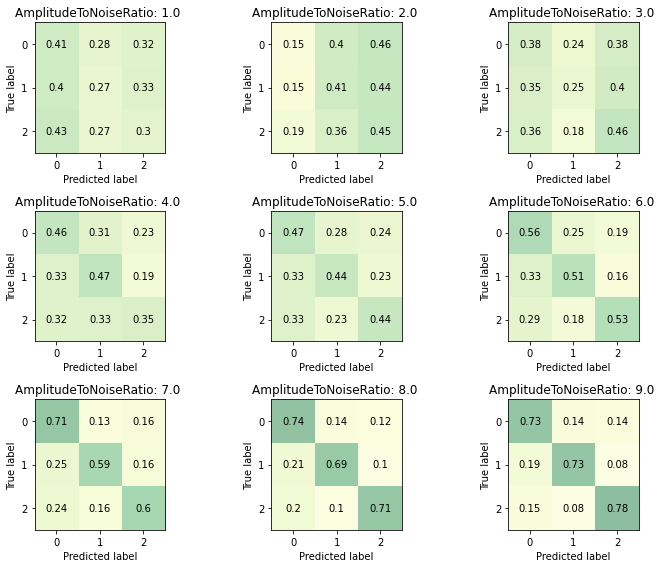

In [23]:
fig, ax1 = plt.subplots(nrows=3, ncols=3, figsize = (15, 8))

for i in range(3):
    for j in range(3):
        c_matrix = confusion_matrix(y_list[3*i+j],y_predicted_list[3*i+j],  normalize = 'true')
        plot_conf_mat(c_matrix, ax1[i, j], f"AmplitudeToNoiseRatio: {As[3*i+j]/50} ")
        """ax1[i,j].matshow(c_matrix, cmap = plt.cm.YlGn, alpha = 0.5)
        ax1[i,j].set_xticks(np.arange(3))
        ax1[i,j].set_yticks(np.arange(3))
        for l in range(3):
            for m in range(3):
                ax1[i,j].text(x=l, y=m, s=round(c_matrix[m, l],2), ha="center", va="center")
        ax1[i,j].xaxis.set_ticks_position('bottom')
        ax1[i,j].set_xlabel('predicted label')
        ax1[i,j].set_ylabel('true label')
        ax1[i,j].set_title(f"AmplitudeToNoiseRatio: {As[3*i+j]/50} ")"""
        fig.tight_layout()
plt.show()

As expected, from the confusion matrices is easy to see that for data with a small signal-to-noise ratio the network classies wrongly more samples. Bigger the amplitude better are the results.

In [24]:
#Saving data of the last fit in .csv files
np.savetxt("DATA/Results_Discrimination_new.csv",np.asarray(res))
np.savetxt("DATA/Results_YPredicted.csv_new",np.asarray(y_predicted_list))

# Ex 2

In this chapter three different networks, using a single convolution layer, are considered. Performances will be in general slightly worse with respect to the network trained with two convoultional layers (less parameters are used).

In [ ]:
np.random.seed(12)
tf.random.set_seed(13)
random.seed(23)

## Data

In [25]:
x = np.loadtxt("DATA/x_ts_comp_N10000.csv", delimiter =",")
categ_y = np.loadtxt("DATA/y_ts_comp_N10000.csv", delimiter =",")

scaler = StandardScaler()
x =  scaler.fit_transform(x.T).T

In [26]:
y = to_categorical(categ_y)

In [27]:
L = len(x[0])
input_shape = (len(x[0]),1)
N_categ = 3

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle = True)
x_train = x_train.reshape(x_train.shape[0],L,1)
x_test = x_test.reshape(x_test.shape[0],L,1)

## First model

#### _1 conv layer (4 filters, kernel_size = 10), 2 dense layers (10 neurons)_

In [29]:
model = compile_model(fil = [4], k_size = [10], dense = [10,10], lam = 0.001, Poolsize = 5)
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 51, 4)             44        
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 10, 4)             0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 40)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                410       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                

In [30]:
batch_size = 250
epochs = 250
fit1 = model.fit(x_train, y_train, batch_size = batch_size, epochs=epochs, validation_data = (x_test, y_test), shuffle = True, verbose = 2)

Epoch 1/250
32/32 - 1s - loss: 1.0971 - accuracy: 0.3509 - val_loss: 1.0920 - val_accuracy: 0.3950
Epoch 2/250
32/32 - 0s - loss: 1.0874 - accuracy: 0.3969 - val_loss: 1.0794 - val_accuracy: 0.4205
Epoch 3/250
32/32 - 0s - loss: 1.0739 - accuracy: 0.4141 - val_loss: 1.0618 - val_accuracy: 0.4585
Epoch 4/250
32/32 - 0s - loss: 1.0518 - accuracy: 0.4423 - val_loss: 1.0370 - val_accuracy: 0.4725
Epoch 5/250
32/32 - 0s - loss: 1.0177 - accuracy: 0.4767 - val_loss: 0.9986 - val_accuracy: 0.4960
Epoch 6/250
32/32 - 0s - loss: 0.9771 - accuracy: 0.5035 - val_loss: 0.9501 - val_accuracy: 0.5165
Epoch 7/250
32/32 - 0s - loss: 0.9260 - accuracy: 0.5334 - val_loss: 0.8958 - val_accuracy: 0.5520
Epoch 8/250
32/32 - 0s - loss: 0.8764 - accuracy: 0.5549 - val_loss: 0.8452 - val_accuracy: 0.5805
Epoch 9/250
32/32 - 0s - loss: 0.8284 - accuracy: 0.5842 - val_loss: 0.8063 - val_accuracy: 0.5990
Epoch 10/250
32/32 - 0s - loss: 0.7921 - accuracy: 0.6062 - val_loss: 0.7744 - val_accuracy: 0.6235
Epoch 11/

Epoch 84/250
32/32 - 0s - loss: 0.6263 - accuracy: 0.7149 - val_loss: 0.6676 - val_accuracy: 0.6980
Epoch 85/250
32/32 - 0s - loss: 0.6272 - accuracy: 0.7121 - val_loss: 0.6654 - val_accuracy: 0.7030
Epoch 86/250
32/32 - 0s - loss: 0.6289 - accuracy: 0.7126 - val_loss: 0.6700 - val_accuracy: 0.7010
Epoch 87/250
32/32 - 0s - loss: 0.6242 - accuracy: 0.7172 - val_loss: 0.6670 - val_accuracy: 0.7000
Epoch 88/250
32/32 - 0s - loss: 0.6282 - accuracy: 0.7163 - val_loss: 0.6666 - val_accuracy: 0.6980
Epoch 89/250
32/32 - 0s - loss: 0.6266 - accuracy: 0.7153 - val_loss: 0.6659 - val_accuracy: 0.7025
Epoch 90/250
32/32 - 0s - loss: 0.6240 - accuracy: 0.7164 - val_loss: 0.6664 - val_accuracy: 0.7045
Epoch 91/250
32/32 - 0s - loss: 0.6207 - accuracy: 0.7178 - val_loss: 0.6662 - val_accuracy: 0.7005
Epoch 92/250
32/32 - 0s - loss: 0.6281 - accuracy: 0.7147 - val_loss: 0.6644 - val_accuracy: 0.7010
Epoch 93/250
32/32 - 0s - loss: 0.6235 - accuracy: 0.7130 - val_loss: 0.6645 - val_accuracy: 0.7015


Epoch 166/250
32/32 - 0s - loss: 0.5976 - accuracy: 0.7319 - val_loss: 0.6587 - val_accuracy: 0.7185
Epoch 167/250
32/32 - 0s - loss: 0.5930 - accuracy: 0.7322 - val_loss: 0.6591 - val_accuracy: 0.7165
Epoch 168/250
32/32 - 0s - loss: 0.5993 - accuracy: 0.7289 - val_loss: 0.6574 - val_accuracy: 0.7175
Epoch 169/250
32/32 - 0s - loss: 0.6008 - accuracy: 0.7300 - val_loss: 0.6560 - val_accuracy: 0.7140
Epoch 170/250
32/32 - 0s - loss: 0.5959 - accuracy: 0.7344 - val_loss: 0.6575 - val_accuracy: 0.7195
Epoch 171/250
32/32 - 0s - loss: 0.5955 - accuracy: 0.7305 - val_loss: 0.6584 - val_accuracy: 0.7130
Epoch 172/250
32/32 - 0s - loss: 0.5955 - accuracy: 0.7360 - val_loss: 0.6574 - val_accuracy: 0.7185
Epoch 173/250
32/32 - 0s - loss: 0.5961 - accuracy: 0.7316 - val_loss: 0.6562 - val_accuracy: 0.7210
Epoch 174/250
32/32 - 0s - loss: 0.5974 - accuracy: 0.7316 - val_loss: 0.6564 - val_accuracy: 0.7215
Epoch 175/250
32/32 - 0s - loss: 0.5972 - accuracy: 0.7312 - val_loss: 0.6558 - val_accurac

Epoch 248/250
32/32 - 0s - loss: 0.5815 - accuracy: 0.7446 - val_loss: 0.6495 - val_accuracy: 0.7165
Epoch 249/250
32/32 - 0s - loss: 0.5808 - accuracy: 0.7412 - val_loss: 0.6502 - val_accuracy: 0.7180
Epoch 250/250
32/32 - 0s - loss: 0.5749 - accuracy: 0.7441 - val_loss: 0.6515 - val_accuracy: 0.7215


In [31]:
print(f"Validation accuracy is {model.evaluate(x_test, y_test, verbose = 0)[1]:1.2}")

Validation accuracy is 0.72


## Second model

#### _1 conv. layer (3 filters, kernel_size = 5), 1 dense layer (12 neuros)_

In [32]:
model = compile_model(fil = [3], k_size = [5], Poolsize = 5, dense = [12], lam = 0.001)
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 56, 3)             18        
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 11, 3)             0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 33)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 12)                408       
_________________________________________________________________
dropout_3 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 39        
Total params: 465
Trainable params: 465
Non-trainable params: 0
________________________________________________________

In [33]:
batch_size = 250
epochs = 250

fit2 = model.fit(x_train, y_train, batch_size = batch_size, epochs=epochs, validation_data = (x_test, y_test), shuffle = True, verbose = 2)

Epoch 1/250
32/32 - 1s - loss: 1.1004 - accuracy: 0.3363 - val_loss: 1.0932 - val_accuracy: 0.3475
Epoch 2/250
32/32 - 0s - loss: 1.0903 - accuracy: 0.3652 - val_loss: 1.0877 - val_accuracy: 0.3890
Epoch 3/250
32/32 - 0s - loss: 1.0830 - accuracy: 0.3921 - val_loss: 1.0799 - val_accuracy: 0.4020
Epoch 4/250
32/32 - 0s - loss: 1.0708 - accuracy: 0.4257 - val_loss: 1.0671 - val_accuracy: 0.4270
Epoch 5/250
32/32 - 0s - loss: 1.0577 - accuracy: 0.4361 - val_loss: 1.0497 - val_accuracy: 0.4760
Epoch 6/250
32/32 - 0s - loss: 1.0414 - accuracy: 0.4535 - val_loss: 1.0316 - val_accuracy: 0.4815
Epoch 7/250
32/32 - 0s - loss: 1.0228 - accuracy: 0.4724 - val_loss: 1.0122 - val_accuracy: 0.4980
Epoch 8/250
32/32 - 0s - loss: 1.0040 - accuracy: 0.4855 - val_loss: 0.9921 - val_accuracy: 0.4985
Epoch 9/250
32/32 - 0s - loss: 0.9864 - accuracy: 0.4959 - val_loss: 0.9742 - val_accuracy: 0.5160
Epoch 10/250
32/32 - 0s - loss: 0.9699 - accuracy: 0.5031 - val_loss: 0.9567 - val_accuracy: 0.5235
Epoch 11/

Epoch 83/250
32/32 - 0s - loss: 0.7482 - accuracy: 0.6428 - val_loss: 0.7299 - val_accuracy: 0.6680
Epoch 84/250
32/32 - 0s - loss: 0.7428 - accuracy: 0.6465 - val_loss: 0.7261 - val_accuracy: 0.6625
Epoch 85/250
32/32 - 0s - loss: 0.7434 - accuracy: 0.6482 - val_loss: 0.7293 - val_accuracy: 0.6590
Epoch 86/250
32/32 - 0s - loss: 0.7401 - accuracy: 0.6488 - val_loss: 0.7265 - val_accuracy: 0.6615
Epoch 87/250
32/32 - 0s - loss: 0.7445 - accuracy: 0.6438 - val_loss: 0.7283 - val_accuracy: 0.6640
Epoch 88/250
32/32 - 0s - loss: 0.7461 - accuracy: 0.6490 - val_loss: 0.7246 - val_accuracy: 0.6585
Epoch 89/250
32/32 - 0s - loss: 0.7432 - accuracy: 0.6457 - val_loss: 0.7234 - val_accuracy: 0.6700
Epoch 90/250
32/32 - 0s - loss: 0.7376 - accuracy: 0.6500 - val_loss: 0.7228 - val_accuracy: 0.6650
Epoch 91/250
32/32 - 0s - loss: 0.7458 - accuracy: 0.6420 - val_loss: 0.7227 - val_accuracy: 0.6670
Epoch 92/250
32/32 - 0s - loss: 0.7388 - accuracy: 0.6536 - val_loss: 0.7218 - val_accuracy: 0.6730


Epoch 165/250
32/32 - 0s - loss: 0.7195 - accuracy: 0.6582 - val_loss: 0.7029 - val_accuracy: 0.6800
Epoch 166/250
32/32 - 0s - loss: 0.7162 - accuracy: 0.6653 - val_loss: 0.7038 - val_accuracy: 0.6785
Epoch 167/250
32/32 - 0s - loss: 0.7173 - accuracy: 0.6650 - val_loss: 0.7035 - val_accuracy: 0.6800
Epoch 168/250
32/32 - 0s - loss: 0.7164 - accuracy: 0.6616 - val_loss: 0.7027 - val_accuracy: 0.6800
Epoch 169/250
32/32 - 0s - loss: 0.7196 - accuracy: 0.6629 - val_loss: 0.7064 - val_accuracy: 0.6780
Epoch 170/250
32/32 - 0s - loss: 0.7185 - accuracy: 0.6590 - val_loss: 0.7023 - val_accuracy: 0.6820
Epoch 171/250
32/32 - 0s - loss: 0.7143 - accuracy: 0.6612 - val_loss: 0.7029 - val_accuracy: 0.6805
Epoch 172/250
32/32 - 0s - loss: 0.7176 - accuracy: 0.6610 - val_loss: 0.7043 - val_accuracy: 0.6790
Epoch 173/250
32/32 - 0s - loss: 0.7192 - accuracy: 0.6572 - val_loss: 0.7030 - val_accuracy: 0.6755
Epoch 174/250
32/32 - 0s - loss: 0.7183 - accuracy: 0.6606 - val_loss: 0.7061 - val_accurac

Epoch 247/250
32/32 - 0s - loss: 0.7093 - accuracy: 0.6645 - val_loss: 0.7055 - val_accuracy: 0.6720
Epoch 248/250
32/32 - 0s - loss: 0.7100 - accuracy: 0.6661 - val_loss: 0.6992 - val_accuracy: 0.6720
Epoch 249/250
32/32 - 0s - loss: 0.7100 - accuracy: 0.6570 - val_loss: 0.6999 - val_accuracy: 0.6720
Epoch 250/250
32/32 - 0s - loss: 0.7048 - accuracy: 0.6659 - val_loss: 0.6983 - val_accuracy: 0.6750


In [34]:
print(f"Validation accuracy is {model.evaluate(x_test, y_test, verbose = 0)[1]:1.2}")

Validation accuracy is 0.68


## Third model

#### _1 conv. layer (13 filters, kernel_size 23),  1 dense layer (3 neurons)_

In [35]:
np.random.seed(12345)

model = compile_model(fil = [13], k_size = [23], Poolsize = 5, dense = [3], lam = 0.001)
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 38, 13)            312       
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 7, 13)             0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 91)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 276       
_________________________________________________________________
dropout_4 (Dropout)          (None, 3)                 0         
_________________________________________________________________
dense_10 (Dense)             (None, 3)                 12        
Total params: 600
Trainable params: 600
Non-trainable params: 0
________________________________________________________

In [36]:
batch_size = 250
epochs = 250

fit3 = model.fit(x_train, y_train, batch_size = batch_size, epochs=epochs, validation_data = (x_test, y_test), shuffle = True, verbose = 2)

Epoch 1/250
32/32 - 1s - loss: 1.1027 - accuracy: 0.3309 - val_loss: 1.0936 - val_accuracy: 0.3835
Epoch 2/250
32/32 - 0s - loss: 1.0900 - accuracy: 0.3689 - val_loss: 1.0851 - val_accuracy: 0.4035
Epoch 3/250
32/32 - 0s - loss: 1.0780 - accuracy: 0.3972 - val_loss: 1.0748 - val_accuracy: 0.4140
Epoch 4/250
32/32 - 0s - loss: 1.0645 - accuracy: 0.4235 - val_loss: 1.0572 - val_accuracy: 0.4675
Epoch 5/250
32/32 - 0s - loss: 1.0456 - accuracy: 0.4539 - val_loss: 1.0395 - val_accuracy: 0.4825
Epoch 6/250
32/32 - 0s - loss: 1.0314 - accuracy: 0.4670 - val_loss: 1.0238 - val_accuracy: 0.5400
Epoch 7/250
32/32 - 0s - loss: 1.0149 - accuracy: 0.4849 - val_loss: 1.0054 - val_accuracy: 0.5455
Epoch 8/250
32/32 - 0s - loss: 1.0004 - accuracy: 0.4991 - val_loss: 0.9859 - val_accuracy: 0.5445
Epoch 9/250
32/32 - 0s - loss: 0.9811 - accuracy: 0.5270 - val_loss: 0.9691 - val_accuracy: 0.5575
Epoch 10/250
32/32 - 0s - loss: 0.9658 - accuracy: 0.5372 - val_loss: 0.9535 - val_accuracy: 0.5585
Epoch 11/

Epoch 84/250
32/32 - 0s - loss: 0.7277 - accuracy: 0.6684 - val_loss: 0.7121 - val_accuracy: 0.6900
Epoch 85/250
32/32 - 0s - loss: 0.7313 - accuracy: 0.6620 - val_loss: 0.7138 - val_accuracy: 0.6900
Epoch 86/250
32/32 - 0s - loss: 0.7360 - accuracy: 0.6576 - val_loss: 0.7141 - val_accuracy: 0.6860
Epoch 87/250
32/32 - 0s - loss: 0.7262 - accuracy: 0.6696 - val_loss: 0.7061 - val_accuracy: 0.6915
Epoch 88/250
32/32 - 0s - loss: 0.7199 - accuracy: 0.6744 - val_loss: 0.7030 - val_accuracy: 0.6940
Epoch 89/250
32/32 - 0s - loss: 0.7217 - accuracy: 0.6743 - val_loss: 0.6999 - val_accuracy: 0.7000
Epoch 90/250
32/32 - 0s - loss: 0.7161 - accuracy: 0.6761 - val_loss: 0.6971 - val_accuracy: 0.7005
Epoch 91/250
32/32 - 0s - loss: 0.7139 - accuracy: 0.6774 - val_loss: 0.6972 - val_accuracy: 0.7000
Epoch 92/250
32/32 - 0s - loss: 0.7118 - accuracy: 0.6840 - val_loss: 0.6891 - val_accuracy: 0.7050
Epoch 93/250
32/32 - 0s - loss: 0.7100 - accuracy: 0.6787 - val_loss: 0.6956 - val_accuracy: 0.7035


Epoch 166/250
32/32 - 0s - loss: 0.6417 - accuracy: 0.7203 - val_loss: 0.6351 - val_accuracy: 0.7445
Epoch 167/250
32/32 - 0s - loss: 0.6547 - accuracy: 0.7129 - val_loss: 0.6358 - val_accuracy: 0.7450
Epoch 168/250
32/32 - 0s - loss: 0.6512 - accuracy: 0.7197 - val_loss: 0.6365 - val_accuracy: 0.7475
Epoch 169/250
32/32 - 0s - loss: 0.6522 - accuracy: 0.7206 - val_loss: 0.6442 - val_accuracy: 0.7450
Epoch 170/250
32/32 - 0s - loss: 0.6555 - accuracy: 0.7134 - val_loss: 0.6320 - val_accuracy: 0.7450
Epoch 171/250
32/32 - 0s - loss: 0.6513 - accuracy: 0.7140 - val_loss: 0.6406 - val_accuracy: 0.7430
Epoch 172/250
32/32 - 0s - loss: 0.6455 - accuracy: 0.7210 - val_loss: 0.6316 - val_accuracy: 0.7420
Epoch 173/250
32/32 - 0s - loss: 0.6458 - accuracy: 0.7193 - val_loss: 0.6346 - val_accuracy: 0.7455
Epoch 174/250
32/32 - 0s - loss: 0.6525 - accuracy: 0.7178 - val_loss: 0.6399 - val_accuracy: 0.7440
Epoch 175/250
32/32 - 0s - loss: 0.6481 - accuracy: 0.7232 - val_loss: 0.6359 - val_accurac

Epoch 248/250
32/32 - 0s - loss: 0.6271 - accuracy: 0.7319 - val_loss: 0.6424 - val_accuracy: 0.7530
Epoch 249/250
32/32 - 0s - loss: 0.6287 - accuracy: 0.7331 - val_loss: 0.6382 - val_accuracy: 0.7505
Epoch 250/250
32/32 - 0s - loss: 0.6439 - accuracy: 0.7268 - val_loss: 0.6350 - val_accuracy: 0.7500


In [37]:
print(f"Validation accuracy is {model.evaluate(x_test, y_test, verbose = 0)[1]:1.2}")

Validation accuracy is 0.75


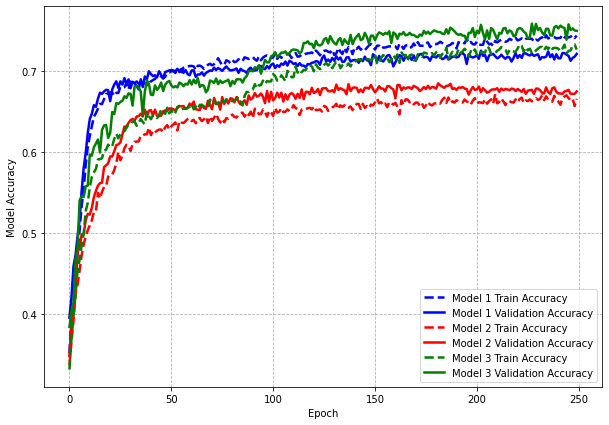

In [38]:
label_fit = ['Model 1', 'Model 2', 'Model 3']
fit_n = [fit1, fit2, fit3]
plot_acc(fit_n, label_fit)

The three models that were tried show similar results. Nevertheless we can appreciate how, in general, adding a dense layer increases consistently the number of parameters with respect to a convolutional layer; this is due to the fully connected structure of the first one. Note that this is not a rule, in fact the number of weights strongly depends on the dimensions of such layers. For example a Conv. layer with an high number of filters bring a huge number of parameters.

# Regularization

Regularization effects on the model performace are studied for the model used in lesson through a grid search.

In [ ]:
# call Keras scikit wrapper
model_gridsearch = KerasClassifier(build_fn = compile_model)

# define parameter dictionary
reg = [regularizers.l1, regularizers.l2, regularizers.l1_l2]
lam = [0.1,0.01,0.001,0.0001]
param_grid = dict(reg = reg , lam = lam)
# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid.fit(x_train,y_train, epochs=250, batch_size = 250, shuffle = True, verbose = 0)

In [40]:
df_GridSearch = pd.read_csv("DATA/Regularization_results.csv", index_col = False)
#df_GridSearch = pd.DataFrame(grid.cv_results_)
df_GridSearch = df_GridSearch.iloc[:,1:]
df_GridSearch.sort_values(by = "rank_test_score", ascending = False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_l,param_reg,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,11.743135,0.396809,0.144392,0.006275,0.1000,<class 'tensorflow.python.keras.regularizers.L1'>,"{'l': 0.1, 'reg': <class 'tensorflow.python.ke...",0.3205,0.3360,0.3140,0.3305,0.325250,0.008548,11
2,15.555042,4.664063,0.180385,0.043716,0.1000,<function l1_l2 at 0x7fa2bbcd2550>,"{'l': 0.1, 'reg': <function l1_l2 at 0x7fa2bbc...",0.3205,0.3360,0.3140,0.3305,0.325250,0.008548,11
3,15.651340,4.081976,0.188800,0.040384,0.0100,<class 'tensorflow.python.keras.regularizers.L1'>,"{'l': 0.01, 'reg': <class 'tensorflow.python.k...",0.6730,0.5395,0.6810,0.5525,0.611500,0.065722,10
10,15.346722,4.184644,0.158263,0.033479,0.0001,<class 'tensorflow.python.keras.regularizers.L2'>,"{'l': 0.0001, 'reg': <class 'tensorflow.python...",0.5415,0.7125,0.7245,0.7145,0.673250,0.076202,9
5,14.771484,4.224691,0.172961,0.031725,0.0100,<function l1_l2 at 0x7fa2bbcd2550>,"{'l': 0.01, 'reg': <function l1_l2 at 0x7fa2bb...",0.7050,0.5505,0.7255,0.7180,0.674750,0.072110,8
1,11.804894,0.155126,0.144236,0.008223,0.1000,<class 'tensorflow.python.keras.regularizers.L2'>,"{'l': 0.1, 'reg': <class 'tensorflow.python.ke...",0.7130,0.6915,0.6825,0.7225,0.702375,0.016056,7
6,16.286934,3.832132,0.168695,0.035507,0.0010,<class 'tensorflow.python.keras.regularizers.L1'>,"{'l': 0.001, 'reg': <class 'tensorflow.python....",0.6950,0.6920,0.7335,0.6980,0.704625,0.016805,6
11,16.200689,4.584406,0.182908,0.044824,0.0001,<function l1_l2 at 0x7fa2bbcd2550>,"{'l': 0.0001, 'reg': <function l1_l2 at 0x7fa2...",0.6950,0.7170,0.7315,0.6980,0.710375,0.014830,5
8,14.526269,4.302998,0.192493,0.048365,0.0010,<function l1_l2 at 0x7fa2bbcd2550>,"{'l': 0.001, 'reg': <function l1_l2 at 0x7fa2b...",0.6930,0.7165,0.6945,0.7445,0.712125,0.020879,4
4,12.064559,1.456055,0.162866,0.031747,0.0100,<class 'tensorflow.python.keras.regularizers.L2'>,"{'l': 0.01, 'reg': <class 'tensorflow.python.k...",0.6880,0.7120,0.7180,0.7320,0.712500,0.015898,3


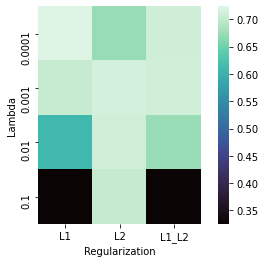

In [41]:
pr = df_GridSearch.pivot(index = "param_l", columns = "param_reg", values = "mean_test_score")
g = sns.heatmap(pr, cmap="mako", square = True)
g.set(xticklabels=["L1", "L2", "L1_L2"])
plt.xticks(rotation=0)
plt.xlabel('Regularization')
plt.ylabel('Lambda')
plt.show()

Best fits are achieved by regularizers with small parameters: L1 and L1_L2 perform best with a parameter = 0.0001. Also L2 allows brings similar results with an higher parameter (0.001). Definitely using a too strong regularization (L1 with 0.1 for example) gives poor results.

Let us now visualize the final weights of one convlutional layers (ex the first one), after the fit procedure.

In [44]:
batch_size = 250
epochs = 250

model1 = compile_model(reg = regularizers.l2,  lam = 0.1,)
model2 = compile_model(reg = regularizers.l2,  lam = 0.001, )

model1.fit(x_train, y_train, batch_size = batch_size, epochs=epochs, validation_data = (x_test, y_test), shuffle = True, verbose = 0)
model2.fit(x_train, y_train, batch_size = batch_size, epochs=epochs, validation_data = (x_test, y_test), shuffle = True, verbose = 0)

Epoch 1/250
32/32 - 1s - loss: 1.1095 - accuracy: 0.3450 - val_loss: 1.1048 - val_accuracy: 0.3455
Epoch 2/250
32/32 - 0s - loss: 1.1012 - accuracy: 0.3660 - val_loss: 1.1000 - val_accuracy: 0.3575
Epoch 3/250
32/32 - 0s - loss: 1.0972 - accuracy: 0.3688 - val_loss: 1.0967 - val_accuracy: 0.3745
Epoch 4/250
32/32 - 0s - loss: 1.0931 - accuracy: 0.3739 - val_loss: 1.0919 - val_accuracy: 0.3900
Epoch 5/250
32/32 - 0s - loss: 1.0843 - accuracy: 0.3927 - val_loss: 1.0781 - val_accuracy: 0.4250
Epoch 6/250
32/32 - 0s - loss: 1.0632 - accuracy: 0.4164 - val_loss: 1.0450 - val_accuracy: 0.4640
Epoch 7/250
32/32 - 0s - loss: 1.0235 - accuracy: 0.4576 - val_loss: 0.9906 - val_accuracy: 0.5085
Epoch 8/250
32/32 - 0s - loss: 0.9712 - accuracy: 0.4919 - val_loss: 0.9407 - val_accuracy: 0.5115
Epoch 9/250
32/32 - 0s - loss: 0.9303 - accuracy: 0.5184 - val_loss: 0.9082 - val_accuracy: 0.5355
Epoch 10/250
32/32 - 0s - loss: 0.8961 - accuracy: 0.5299 - val_loss: 0.8678 - val_accuracy: 0.5640
Epoch 11/

32/32 - 0s - loss: 0.6881 - accuracy: 0.6896 - val_loss: 0.6903 - val_accuracy: 0.6945
Epoch 84/250
32/32 - 0s - loss: 0.6815 - accuracy: 0.6919 - val_loss: 0.6869 - val_accuracy: 0.6910
Epoch 85/250
32/32 - 0s - loss: 0.6883 - accuracy: 0.6889 - val_loss: 0.6917 - val_accuracy: 0.6960
Epoch 86/250
32/32 - 0s - loss: 0.6864 - accuracy: 0.6905 - val_loss: 0.6937 - val_accuracy: 0.6875
Epoch 87/250
32/32 - 0s - loss: 0.6886 - accuracy: 0.6885 - val_loss: 0.6869 - val_accuracy: 0.6860
Epoch 88/250
32/32 - 0s - loss: 0.6849 - accuracy: 0.6875 - val_loss: 0.6865 - val_accuracy: 0.6865
Epoch 89/250
32/32 - 0s - loss: 0.6860 - accuracy: 0.6837 - val_loss: 0.6908 - val_accuracy: 0.6870
Epoch 90/250
32/32 - 0s - loss: 0.6846 - accuracy: 0.6906 - val_loss: 0.6914 - val_accuracy: 0.6890
Epoch 91/250
32/32 - 0s - loss: 0.6854 - accuracy: 0.6901 - val_loss: 0.6957 - val_accuracy: 0.6900
Epoch 92/250
32/32 - 0s - loss: 0.6816 - accuracy: 0.6909 - val_loss: 0.6859 - val_accuracy: 0.6975
Epoch 93/250


Epoch 165/250
32/32 - 0s - loss: 0.6510 - accuracy: 0.7042 - val_loss: 0.6772 - val_accuracy: 0.7005
Epoch 166/250
32/32 - 0s - loss: 0.6504 - accuracy: 0.7061 - val_loss: 0.6559 - val_accuracy: 0.6975
Epoch 167/250
32/32 - 0s - loss: 0.6487 - accuracy: 0.7078 - val_loss: 0.6648 - val_accuracy: 0.6955
Epoch 168/250
32/32 - 0s - loss: 0.6477 - accuracy: 0.7020 - val_loss: 0.6574 - val_accuracy: 0.7040
Epoch 169/250
32/32 - 0s - loss: 0.6515 - accuracy: 0.7032 - val_loss: 0.6600 - val_accuracy: 0.7015
Epoch 170/250
32/32 - 0s - loss: 0.6474 - accuracy: 0.7041 - val_loss: 0.6567 - val_accuracy: 0.6990
Epoch 171/250
32/32 - 0s - loss: 0.6452 - accuracy: 0.7117 - val_loss: 0.6550 - val_accuracy: 0.7055
Epoch 172/250
32/32 - 0s - loss: 0.6458 - accuracy: 0.7088 - val_loss: 0.6583 - val_accuracy: 0.6990
Epoch 173/250
32/32 - 0s - loss: 0.6455 - accuracy: 0.7085 - val_loss: 0.6600 - val_accuracy: 0.7060
Epoch 174/250
32/32 - 0s - loss: 0.6504 - accuracy: 0.7014 - val_loss: 0.6617 - val_accurac

32/32 - 0s - loss: 0.6044 - accuracy: 0.7415 - val_loss: 0.6113 - val_accuracy: 0.7445
Epoch 247/250
32/32 - 0s - loss: 0.5989 - accuracy: 0.7494 - val_loss: 0.6189 - val_accuracy: 0.7390
Epoch 248/250
32/32 - 0s - loss: 0.6177 - accuracy: 0.7424 - val_loss: 0.6193 - val_accuracy: 0.7420
Epoch 249/250
32/32 - 0s - loss: 0.6065 - accuracy: 0.7410 - val_loss: 0.6203 - val_accuracy: 0.7375
Epoch 250/250
32/32 - 0s - loss: 0.6045 - accuracy: 0.7420 - val_loss: 0.6325 - val_accuracy: 0.7220
Epoch 1/250
32/32 - 1s - loss: 1.0991 - accuracy: 0.3352 - val_loss: 1.0957 - val_accuracy: 0.3725
Epoch 2/250
32/32 - 0s - loss: 1.0931 - accuracy: 0.3711 - val_loss: 1.0874 - val_accuracy: 0.4025
Epoch 3/250
32/32 - 0s - loss: 1.0797 - accuracy: 0.4051 - val_loss: 1.0647 - val_accuracy: 0.4340
Epoch 4/250
32/32 - 0s - loss: 1.0401 - accuracy: 0.4512 - val_loss: 0.9967 - val_accuracy: 0.5170
Epoch 5/250
32/32 - 0s - loss: 0.9599 - accuracy: 0.5055 - val_loss: 0.9020 - val_accuracy: 0.5650
Epoch 6/250
32

32/32 - 0s - loss: 0.6344 - accuracy: 0.6989 - val_loss: 0.6554 - val_accuracy: 0.6925
Epoch 79/250
32/32 - 0s - loss: 0.6336 - accuracy: 0.6995 - val_loss: 0.6551 - val_accuracy: 0.6925
Epoch 80/250
32/32 - 0s - loss: 0.6350 - accuracy: 0.7006 - val_loss: 0.6542 - val_accuracy: 0.6945
Epoch 81/250
32/32 - 0s - loss: 0.6356 - accuracy: 0.7021 - val_loss: 0.6513 - val_accuracy: 0.6960
Epoch 82/250
32/32 - 0s - loss: 0.6345 - accuracy: 0.6965 - val_loss: 0.6557 - val_accuracy: 0.6960
Epoch 83/250
32/32 - 0s - loss: 0.6327 - accuracy: 0.7003 - val_loss: 0.6530 - val_accuracy: 0.6910
Epoch 84/250
32/32 - 0s - loss: 0.6282 - accuracy: 0.7023 - val_loss: 0.6574 - val_accuracy: 0.6945
Epoch 85/250
32/32 - 0s - loss: 0.6317 - accuracy: 0.7050 - val_loss: 0.6565 - val_accuracy: 0.6835
Epoch 86/250
32/32 - 0s - loss: 0.6332 - accuracy: 0.6995 - val_loss: 0.6524 - val_accuracy: 0.6945
Epoch 87/250
32/32 - 0s - loss: 0.6303 - accuracy: 0.7028 - val_loss: 0.6539 - val_accuracy: 0.6970
Epoch 88/250


Epoch 160/250
32/32 - 0s - loss: 0.6020 - accuracy: 0.7204 - val_loss: 0.6331 - val_accuracy: 0.7185
Epoch 161/250
32/32 - 0s - loss: 0.6003 - accuracy: 0.7214 - val_loss: 0.6366 - val_accuracy: 0.7205
Epoch 162/250
32/32 - 0s - loss: 0.6054 - accuracy: 0.7206 - val_loss: 0.6336 - val_accuracy: 0.7145
Epoch 163/250
32/32 - 0s - loss: 0.5994 - accuracy: 0.7210 - val_loss: 0.6305 - val_accuracy: 0.7180
Epoch 164/250
32/32 - 0s - loss: 0.5992 - accuracy: 0.7225 - val_loss: 0.6311 - val_accuracy: 0.7160
Epoch 165/250
32/32 - 0s - loss: 0.5999 - accuracy: 0.7204 - val_loss: 0.6307 - val_accuracy: 0.7255
Epoch 166/250
32/32 - 0s - loss: 0.5952 - accuracy: 0.7228 - val_loss: 0.6309 - val_accuracy: 0.7195
Epoch 167/250
32/32 - 0s - loss: 0.5974 - accuracy: 0.7211 - val_loss: 0.6333 - val_accuracy: 0.7215
Epoch 168/250
32/32 - 0s - loss: 0.6006 - accuracy: 0.7224 - val_loss: 0.6327 - val_accuracy: 0.7260
Epoch 169/250
32/32 - 0s - loss: 0.5971 - accuracy: 0.7188 - val_loss: 0.6299 - val_accurac

Epoch 242/250
32/32 - 0s - loss: 0.5667 - accuracy: 0.7498 - val_loss: 0.6006 - val_accuracy: 0.7540
Epoch 243/250
32/32 - 0s - loss: 0.5691 - accuracy: 0.7484 - val_loss: 0.5985 - val_accuracy: 0.7575
Epoch 244/250
32/32 - 0s - loss: 0.5648 - accuracy: 0.7504 - val_loss: 0.5987 - val_accuracy: 0.7570
Epoch 245/250
32/32 - 0s - loss: 0.5671 - accuracy: 0.7549 - val_loss: 0.5992 - val_accuracy: 0.7550
Epoch 246/250
32/32 - 0s - loss: 0.5757 - accuracy: 0.7461 - val_loss: 0.5997 - val_accuracy: 0.7550
Epoch 247/250
32/32 - 0s - loss: 0.5635 - accuracy: 0.7534 - val_loss: 0.5991 - val_accuracy: 0.7550
Epoch 248/250
32/32 - 0s - loss: 0.5677 - accuracy: 0.7473 - val_loss: 0.5957 - val_accuracy: 0.7570
Epoch 249/250
32/32 - 0s - loss: 0.5634 - accuracy: 0.7554 - val_loss: 0.5963 - val_accuracy: 0.7600
Epoch 250/250
32/32 - 0s - loss: 0.5614 - accuracy: 0.7533 - val_loss: 0.5965 - val_accuracy: 0.7580


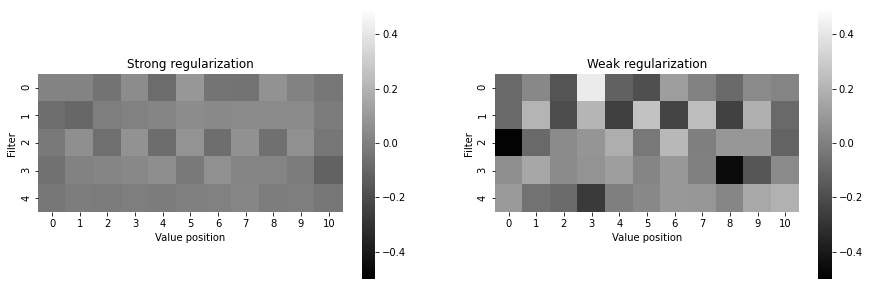

In [47]:
fig, axes = plt.subplots(1,2,figsize=(15,5))

filters, biases = model1.layers[0].get_weights()
sns.heatmap(filters.reshape(11,5).T, ax = axes[0], cmap = "gray", vmin = -0.5, vmax = 0.5, square = True)
axes[0].set_title("Strong regularization")
axes[0].set_ylabel('Filter')
axes[0].set_xlabel('Value position')

filters, biases = model2.layers[0].get_weights()
sns.heatmap(filters.reshape(11,5).T, ax = axes[1], cmap = "gray", vmin = -0.5, vmax = 0.5, square = True)
axes[1].set_title("Weak regularization")
axes[1].set_ylabel('Filter')
axes[1].set_xlabel('Value position')

plt.show()

As expected, in the case of stronger regualarization the final values of the weights are smaller compared to the one reached with a weaker regularization. Therefore a weaker regularization allows to see eventual patterns in the final parameters.  

In [48]:
results1 = model1.evaluate(x_test, y_test, verbose = 0)
results2 = model2.evaluate(x_test, y_test, verbose = 0)

print(f"Validation accuracy for strong regularization is {results1[1]:1.2}, while for weak regularization is {results2[1]:1.2}")

Validation accuracy for strong regularization is 0.72, while for weak regularization is 0.76


In the next cells weights coming from different type of regularization (L1 and L2) are compared.

In [51]:
model3 = compile_model(reg = regularizers.l1,  lam = 0.001)
model3.fit(x_train, y_train, batch_size = batch_size, epochs=epochs, validation_data = (x_test, y_test), shuffle = True, verbose = 0)

Epoch 1/250
32/32 - 1s - loss: 1.0977 - accuracy: 0.3485 - val_loss: 1.0941 - val_accuracy: 0.3915
Epoch 2/250
32/32 - 0s - loss: 1.0910 - accuracy: 0.3738 - val_loss: 1.0832 - val_accuracy: 0.4390
Epoch 3/250
32/32 - 0s - loss: 1.0761 - accuracy: 0.4058 - val_loss: 1.0629 - val_accuracy: 0.4370
Epoch 4/250
32/32 - 0s - loss: 1.0544 - accuracy: 0.4274 - val_loss: 1.0330 - val_accuracy: 0.4805
Epoch 5/250
32/32 - 0s - loss: 1.0191 - accuracy: 0.4568 - val_loss: 0.9923 - val_accuracy: 0.5270
Epoch 6/250
32/32 - 0s - loss: 0.9799 - accuracy: 0.4886 - val_loss: 0.9448 - val_accuracy: 0.5425
Epoch 7/250
32/32 - 0s - loss: 0.9316 - accuracy: 0.5171 - val_loss: 0.8969 - val_accuracy: 0.5655
Epoch 8/250
32/32 - 0s - loss: 0.8860 - accuracy: 0.5465 - val_loss: 0.8549 - val_accuracy: 0.5875
Epoch 9/250
32/32 - 0s - loss: 0.8555 - accuracy: 0.5610 - val_loss: 0.8280 - val_accuracy: 0.5850
Epoch 10/250
32/32 - 0s - loss: 0.8275 - accuracy: 0.5791 - val_loss: 0.8057 - val_accuracy: 0.5980
Epoch 11/

32/32 - 0s - loss: 0.6689 - accuracy: 0.6874 - val_loss: 0.6771 - val_accuracy: 0.6910
Epoch 84/250
32/32 - 0s - loss: 0.6694 - accuracy: 0.6862 - val_loss: 0.6761 - val_accuracy: 0.6905
Epoch 85/250
32/32 - 0s - loss: 0.6645 - accuracy: 0.6891 - val_loss: 0.6797 - val_accuracy: 0.6805
Epoch 86/250
32/32 - 0s - loss: 0.6727 - accuracy: 0.6851 - val_loss: 0.6758 - val_accuracy: 0.6880
Epoch 87/250
32/32 - 0s - loss: 0.6700 - accuracy: 0.6859 - val_loss: 0.6779 - val_accuracy: 0.6860
Epoch 88/250
32/32 - 0s - loss: 0.6707 - accuracy: 0.6869 - val_loss: 0.6780 - val_accuracy: 0.6865
Epoch 89/250
32/32 - 0s - loss: 0.6659 - accuracy: 0.6840 - val_loss: 0.6807 - val_accuracy: 0.6865
Epoch 90/250
32/32 - 0s - loss: 0.6697 - accuracy: 0.6894 - val_loss: 0.6777 - val_accuracy: 0.6930
Epoch 91/250
32/32 - 0s - loss: 0.6691 - accuracy: 0.6902 - val_loss: 0.6742 - val_accuracy: 0.6925
Epoch 92/250
32/32 - 0s - loss: 0.6676 - accuracy: 0.6862 - val_loss: 0.6725 - val_accuracy: 0.6885
Epoch 93/250


Epoch 165/250
32/32 - 0s - loss: 0.6374 - accuracy: 0.7039 - val_loss: 0.6520 - val_accuracy: 0.7030
Epoch 166/250
32/32 - 0s - loss: 0.6356 - accuracy: 0.7055 - val_loss: 0.6514 - val_accuracy: 0.7045
Epoch 167/250
32/32 - 0s - loss: 0.6362 - accuracy: 0.7086 - val_loss: 0.6543 - val_accuracy: 0.6935
Epoch 168/250
32/32 - 0s - loss: 0.6366 - accuracy: 0.7028 - val_loss: 0.6497 - val_accuracy: 0.7050
Epoch 169/250
32/32 - 0s - loss: 0.6371 - accuracy: 0.7035 - val_loss: 0.6498 - val_accuracy: 0.7030
Epoch 170/250
32/32 - 0s - loss: 0.6398 - accuracy: 0.7016 - val_loss: 0.6496 - val_accuracy: 0.7010
Epoch 171/250
32/32 - 0s - loss: 0.6382 - accuracy: 0.7011 - val_loss: 0.6538 - val_accuracy: 0.6940
Epoch 172/250
32/32 - 0s - loss: 0.6321 - accuracy: 0.7065 - val_loss: 0.6519 - val_accuracy: 0.7025
Epoch 173/250
32/32 - 0s - loss: 0.6317 - accuracy: 0.7096 - val_loss: 0.6504 - val_accuracy: 0.7075
Epoch 174/250
32/32 - 0s - loss: 0.6358 - accuracy: 0.7092 - val_loss: 0.6492 - val_accurac

32/32 - 0s - loss: 0.6303 - accuracy: 0.7117 - val_loss: 0.6466 - val_accuracy: 0.7035
Epoch 247/250
32/32 - 0s - loss: 0.6266 - accuracy: 0.7089 - val_loss: 0.6409 - val_accuracy: 0.7070
Epoch 248/250
32/32 - 0s - loss: 0.6332 - accuracy: 0.7064 - val_loss: 0.6421 - val_accuracy: 0.7135
Epoch 249/250
32/32 - 0s - loss: 0.6263 - accuracy: 0.7150 - val_loss: 0.6421 - val_accuracy: 0.7130
Epoch 250/250
32/32 - 0s - loss: 0.6212 - accuracy: 0.7122 - val_loss: 0.6420 - val_accuracy: 0.7105


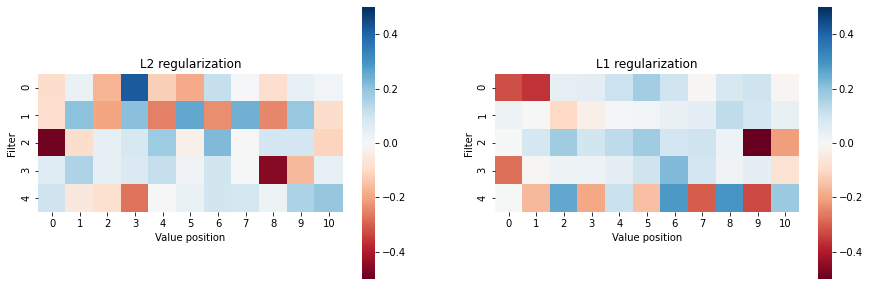

In [52]:
fig, axes = plt.subplots(1,2,figsize=(15,5))

filters, biases = model2.layers[0].get_weights()
sns.heatmap(filters.reshape(11,5).T, ax = axes[0], cmap = "RdBu", vmin = -0.5, vmax = 0.5, square = True)
axes[0].set_title("L2 regularization")
axes[0].set_ylabel('Filter')
axes[0].set_xlabel('Value position')

filters, biases = model3.layers[0].get_weights()
sns.heatmap(filters.reshape(11,5).T, ax = axes[1], cmap = "RdBu", vmin = -0.5, vmax = 0.5, square = True)
axes[1].set_title("L1 regularization")
axes[1].set_ylabel('Filter')
axes[1].set_xlabel('Value position')

plt.show()

As expected one can see that the weights matrices coming from L1 regularization are more sparse, with more value that are almost zero. This is the typical effect of Lasso regularization.

## Bias Regularization

In [53]:
model = compile_model()
fit1 = model.fit(x_train, y_train, batch_size = batch_size, epochs=epochs, validation_data = (x_test, y_test), shuffle = True, verbose = 0)

In [54]:
print(f"Validation loss is {model.evaluate(x_test, y_test, verbose = 0)[1]:1.2}. This is the reference result")

Validation loss is 0.75. This is the reference result


In [55]:
model = compile_model()
fit2 = model.fit(x_train, y_train, batch_size = batch_size, epochs=epochs, validation_data = (x_test, y_test), shuffle = True, verbose = 0)

In [56]:
print(f"Validation loss with bias regularization is {model.evaluate(x_test, y_test, verbose = 0)[1]:1.2}")

Validation loss with bias regularization is 0.7


In [57]:
model = compile_model()
fit3 = model.fit(x_train, y_train, batch_size = batch_size, epochs=epochs, validation_data = (x_test, y_test), shuffle = True, verbose = 0)

In [58]:
print(f"Validation accuracy with activity regularization is {model.evaluate(x_test, y_test, verbose = 0)[1]:1.2}")

Validation accuracy with activity regularization is 0.72


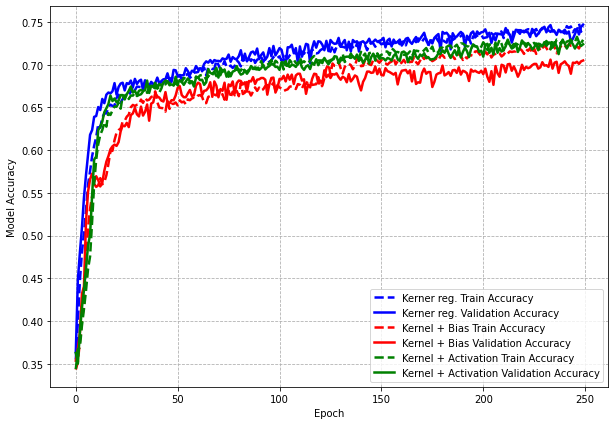

In [59]:
label_fit = ['Kerner reg.', 'Kernel + Bias reg.', 'Kernel + Activation reg.']
fit_n = [fit1, fit2, fit3]
plot_acc(fit_n, label_fit)

Different regularizations have similar performances. Bias + Kernel regularization seems to be the worst among the three.

# Appendix: exercise 2 CNN application

In this section we repeat the analysis of the dataset used in the exercise of the second week using a CNN.

In [87]:
np.random.seed(12)
tf.random.set_seed(13)
random.seed(23)

## Data

In [88]:
fname="DATA/sequences16.csv"
sx, sy = np.loadtxt(fname,delimiter=',',
                   usecols= (0,1), unpack=True, dtype = str)

In [89]:
N = len(sy)
print(f"Number of total samples {N}")
Ls = len(sx[0])
print(f"Lenght of a sample {Ls}")

print(f"Sample: {sx[0]}, label: {sy[0]}")

perc_train = 0.7
N_train = int(N*perc_train)
N_test = N -N_train
print(f'\ndata:{N}\ntrain: {N_train}\ntest: {N_test}')

Number of total samples 3000
Lenght of a sample 16
Sample: AAGGTCTGCCGGCCGA, label: 1

data:3000
train: 2100
test: 900


In [90]:
Q = ['A', 'C', 'G', 'T']
Nc=4
onehc = {Q[i]: i for i in range(Nc)}
print(f"One-hot encoding dictionary: {onehc}")

One-hot encoding dictionary: {'A': 0, 'C': 1, 'G': 2, 'T': 3}


## Data conversion: One-Hot Encoding

In [91]:
Y = sy.astype(int)

L = Ls*Nc
print(f"Product of lenght ({Ls}) and character possibilities ({Nc}): {L}\n")

X = np.zeros((N,L))

for n in range(N):
    for i in range(Ls):
        X[n][i*4 + onehc[sx[n][i]]] = 1
print(f"Original sequence:\n {sx[0]}\n")
print(f"Encoded sequence:\n {X[0]}")

Product of lenght (16) and character possibilities (4): 64

Original sequence:
 AAGGTCTGCCGGCCGA

Encoded sequence:
 [1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]


## Split train/test - validation

In [92]:
(X_train, Y_train) = (X[:N_train], Y[:N_train])
(X_test, Y_test) = (X[N_train:], Y[N_train:])
print(f"Ratio between y_train labels sum and train samples: {y_train.sum() / N_train}")
print(f"Ratio between y_test  labels sum and test samples: {y_test.sum() / N_test}")

Ratio between y_train labels sum and train samples: 3.8095238095238093
Ratio between y_test  labels sum and test samples: 2.2222222222222223


## Model

A CNN is designed and compared with the best NN obtainied in the __exercise 2__

In [98]:
model = keras.Sequential([
    # Block One
    keras.layers.Conv1D(filters=16, kernel_size=3, activation='relu', padding='same',
                  input_shape=[16,4]),
    keras.layers.MaxPool1D(),

    # Block Two
    keras.layers.Conv1D(filters=16, kernel_size=6, activation='relu', padding='same'),
    keras.layers.MaxPool1D(),

    # Head
    keras.layers.Flatten(),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer="adam",
    loss='binary_crossentropy',
    metrics=['accuracy'])

model.summary()

Model: "sequential_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_111 (Conv1D)          (None, 16, 16)            208       
_________________________________________________________________
max_pooling1d_60 (MaxPooling (None, 8, 16)             0         
_________________________________________________________________
conv1d_112 (Conv1D)          (None, 8, 16)             1552      
_________________________________________________________________
max_pooling1d_61 (MaxPooling (None, 4, 16)             0         
_________________________________________________________________
flatten_57 (Flatten)         (None, 64)                0         
_________________________________________________________________
dense_127 (Dense)            (None, 4)                 260       
_________________________________________________________________
dropout_60 (Dropout)         (None, 4)               

In [99]:
new_X_train = X_train.reshape(2100, 16,4)
new_X_test = X_test.reshape(900,16,4)

In [106]:
batch_size = 250
epochs = 150
fit = model.fit(new_X_train, Y_train, batch_size = batch_size, epochs=epochs, validation_data = (new_X_test, Y_test), shuffle = True, verbose = 2)

Epoch 1/150


ValueError: in user code:

    c:\program files\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    c:\program files\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\program files\python37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\program files\python37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\program files\python37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\program files\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    c:\program files\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:754 train_step
        y_pred = self(x, training=True)
    c:\program files\python37\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    c:\program files\python37\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:259 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer sequential_62 is incompatible with the layer: expected axis -1 of input shape to have value 64 but received input with shape (None, 16, 4)


In [103]:
model = Sequential()

model.add(Dense(L,input_shape=(L,),activation = "relu"))
model.add(Dense(L/2,activation = "relu"))
model.add(Dense(L/4,activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(1,activation="sigmoid"))

model.summary()

model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics= ["accuracy"])

fit_best = model.fit(X_train, Y_train, epochs=150, batch_size = 50, validation_data = (X_test,Y_test), shuffle = True, verbose = 0)



Model: "sequential_62"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_133 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_134 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_135 (Dense)            (None, 16)                528       
_________________________________________________________________
dropout_62 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_136 (Dense)            (None, 1)                 17        
Total params: 6,785
Trainable params: 6,785
Non-trainable params: 0
_________________________________________________________________


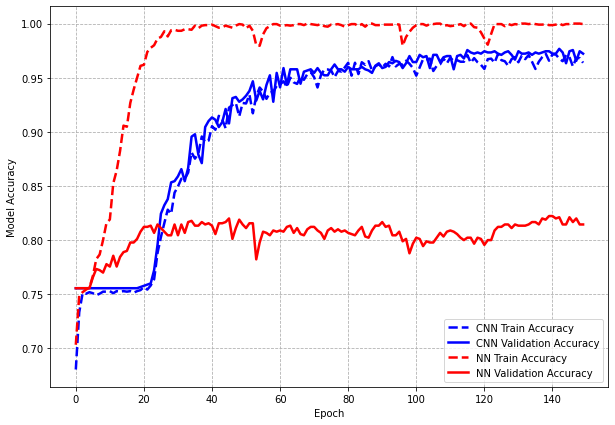

In [104]:
label_fit = ['CNN', 'NN']
fit_n = [fit, fit_best]
plot_acc(fit_n, label_fit)

The CNN model has improved a lot the validation accuracy using less parameters.